# PAC 2 - Web Scraping

## 0. INTRODUCCIÓN

En esta PEC vamos a trabajar la extracción automática de datos de la web, proceso Conocido como web scraping. Antes de ponernos manos a la obra, vamos a Refrescar algunos conceptos e introducir puntos claves de las librerías con las que vamos a trabajar.

En la web, los servidores y los clientes generalmente se comunican a través de solicitudes HTTP.
El protocolo HTTP (‘Hyper Text Transfer Protocol’) especifica cómo se formatean y transmiten las solicitudes y respuestas.
Mediante este proceso solicitud-respuesta, es como se realiza la mayor parte de la navegación web. Al abrir una página, el navegador envía una solicitud al servidor de esa página, y el servidor responde con los recursos relevantes (texto, imágenes, tablas, etc. ).

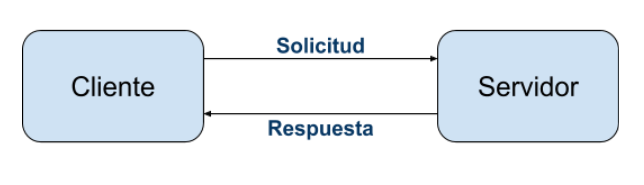


Principalmente, hay dos tipos de **solicitudes**:

1.   GET



- Permiten obtener datos del servidor.
- Se puede marcar como favorito.
- Los parámetros se agregan directamente a la URL.
- No se utiliza para enviar información confidencial (como contraseñas)


2.   POST

- Normalmente	se usa cuando un estado necesita ser alterado (como agregarle elementos carrito de compras) o al enviar contraseñas.
- Los parámetros se agregan en un cuerpo separado, así es más seguro
- No se puede marcar como favorito.


La **respuesta** contiene 2 piezas principales de información: el código de estado y el cuerpo de la respuesta.

- El __código de estado__ indica si la solicitud fue exitosa y / o la existencia de algún error. Está representado por un número de 3 dígitos.

  - Los códigos en estos rangos indican:

    - 2xx: Éxito.
    - 3xx: Redirección.
    - 4xx: Error del cliente.
    - 5xx: Error del servidor.

  - Los dos códigos más frecuentes son los siguientes:
    - 200 OK: La solicitud se cursó exitosamente.
    - 404 Not Found: El servidor no puede encontrar la página o fuente solicitada.

- El __cuerpo de la respuesta__ contiene la información de la solicitud. Normalmente, se obtiene en formato HTML o JSON.



---

Un **documento HTML** está formado por un conjunto de elementos o etiquetas anidadas, además de código JavaScript y CSS.

Antes de hacer scraping, por tanto, debemos conocer qué elementos o qué etiqueta contiene la información que queremos obtener de la página web en cuestión. Para ello, tenemos que tener presente las siguientes consideraciones:

- Un elemento o etiqueta tiene la siguiente sintaxis:

> **\<nombre_etiqueta\>**contenido **\<\/nombre_etiqueta\>**

> Estos elementos pueden tener información adicional especificada en los atributos de la etiqueta.


- Los atributos más comunes son:

  - id

  - class

> Ejemplo: \<div class=“descriptive-class-name”\>….\<\/div\>





- Las etiquetas más populares son:

  - link: \<a href=“url_of_link”\>Texto del link\<\/a\>
  - párrafo: \<p\>…\<\/p\>
  - .... \<h1\>…\<\/h1\>
  - etiqueta de un contenedor o conjunto de etiquetas: \<div class=“hahaha”\>…\<\/div\>
  - Etiqueta para marcar parte del contenido: \<span id=“id de este span”\>…\<\/span\>








_Ejemplo esquema básico de un documento HTML_




```
<html>
	<head>
		<meta charset=”utf-8”/>
		<title> Ejemplo </title>
	</head>
	<body>
		<h1> Encabezado 1</h1>
		<p> Primer párrafo del ejemplo del html de ejemplo. </p>
		<h2> Encabezado 2.  </h2>
			<ul>
				<li>Element 1 de la lista</li>
				<li>Element 2 de la lista</li>
			</ul>
    <div>
      <p>Segundo párrafo. </p>
      <table>
        <th>Tabla de ejemplo </th>
        <tr>
          <td>celda 1,1 </td>
          <td>celda 1,2 </td>
          <td>celda 1,3 </td>
        </tr>
        <tr>
          <td>celda 2,1 </td>
          <td>celda 2,2 </td>
          <td>celda 2,3 </td>
        </tr>
      </table>
    </div>
	</body>
</html>

```




---

Las **principales metodologías** que nos permiten hacer web scraping son:

- Utilizando APIs (Application programming interface)
- Mediante Scrapers (librerías que nos permiten extraer datos web automáticamente. Por ejemplo, BeautifulSoap, Requests-html,...)
- Web crawling (un programa ‘spider’ busca por el contenido solicitado siguiendo links y explorandolos).




## 1. WEB SCRAPING CON APIs

Una **API** es una interfaz de programación de aplicaciones. Esta especifica cómo deben interactuar cliente y un servidor. Si el cliente realiza una solicitud en un formato específico, el servidor siempre responderá en un formato documentado o iniciará una acción.

Algunas API son gratuitas, la mayoría son de pago o requieren registro. En el último caso, normalmente se proporciona una clave (_KEY_) y una identificación (_IDENTIFICATION\_KEY_) que debe incorporarse en cada solicitud a esa API. Por último, algunas API de pago ofrecen también una versión gratuita disponible con fines educativos o académicos, prohíbiendo la comercialización de productos que hagan su uso sin previo pago de licencia.

Para realizar las consultas se requiere la previa **revisión de la documentación que proporciona la API** para conocer la sintaxis que requieren las consultas o solicitudes y cuáles son los códigos de estados relevantes de la misma.

En esta parte de la PAC vamos a trabajar con una API libre que no requiere registro, otra gratuita que si que lo requiere, y por último una API que es gratuita para uso académico y con previo registro.

### 1.1. APIs SIN REGISTRO



Para trabajar esta parte, vamos a realizar el scraping de datos relativos al mercado eléctrico español mediante una API que proporciona datos de generación, demanda, transporte, etc. de electricidad publicado por REE (Red Eléctrica de España).

La documentacion de la API está disponible en: https://www.ree.es/en/apidatos

En primer lugar, debemos cargar las librerías que vamos a utilizar y definir la URL común a todas las solicitudes (_requests_) que vamos a realizar (url_base) y especificar los paramétros de la petición que deseemos hacer:

In [14]:
# Cargar packages
import requests # La librería requests proporciona las capacidades de mandar una petición/solicitud HTTP al servidor
import json

In [15]:
# Definir la URL común a todas las requests de la web que vamos a scrapear
url_base = 'https://apidatos.ree.es/es/datos/'
url_compl = 'generacion/estructura-generacion?start_date=2023-07-01T00:00&end_date=2023-07-31T00:00&time_trunc=month'

In [16]:
# Realizar una solicitud (request) al endpoint de la API con el método requests.get
respuesta = requests.get(url_base+url_compl)

Revisaremos el estado de la solicitud mediante el atributo _.status\_code_ de la respuesta.

In [18]:
# Comprobar el estado de la solicitud
respuesta.status_code

200

Como vemos, la solicitud se ha cursado correctamente. También se podría verificar con el atributo _.ok_

In [20]:
# Checking if the request went through ok
respuesta.ok

True

En este caso, la respuesta se puede obtener en formato json. Por tanto, para visualizar la respuesta en tal formato, aplicamos el método _.json()_. Además, con el uso de la librería json se puede hacer más leíble la respuesta.

In [22]:
print ('\n\nLas claves del diccionario son:\n'+str( respuesta.json().keys()) )

print(json.dumps(respuesta.json(),indent=4))



Las claves del diccionario son:
dict_keys(['data', 'included'])
{
    "data": {
        "type": "Generaci\u00f3n por tecnolog\u00eda",
        "id": "gen1",
        "attributes": {
            "title": "Generaci\u00f3n por tecnolog\u00eda",
            "last-update": "2024-11-11T22:27:21.000+01:00",
            "description": null
        },
        "meta": {
            "cache-control": {
                "cache": "HIT",
                "expireAt": "2024-12-12T09:14:15"
            }
        }
    },
    "included": [
        {
            "type": "Hidr\u00e1ulica",
            "id": "10288",
            "groupId": "1",
            "attributes": {
                "title": "Hidr\u00e1ulica",
                "description": null,
                "color": "#0090d1",
                "type": "Renovable",
                "magnitude": null,
                "composite": false,
                "last-update": "2024-11-11T22:27:17.000+01:00",
                "values": [
                    {
   

A partir de la URL base, modificando los parámetros de la url, se pueden obtener detalles como el balance eléctrico, la demanda (en términos de sectores económicos, la evolución, etc.), la generacón (con su estructura, la cantidad renovable, la potencia instalada, el balance en términos de CO2, etc.), los intercambios con los países colindantes, el transporte (líneas, cortes, interrupciones, etc.) y datos referentes al mercado como pueden ser los precios, costes, etc. Todos estos datos se pueden obtener por CCAA o en global así como especificando el rango temporal y con distinta frecuencia.

La sintaxis de los diferentes parametros de la url quedan explicados en la documentación de la API, de forma que podamos modificarlos de acuerdo con lo que se desee obtener.

_Por ejemplo, para conocer la demanda eléctrica mensual (time_trunc = month) a lo largo del 2019 para Navarra y las Baleares, la solicitud quedaría como sigue:_

In [25]:
# Definir url base y los parametros de la url correspondientes a la información que se desee obtener.
url_base = 'https://apidatos.ree.es/es/datos/'
url_compl1 = 'demanda/evolucion?start_date=2019-01-01T00:00&end_date=2019-12-31T23:59&time_trunc=month&geo_trunc=electric_system&geo_limit=ccaa&geo_ids=8743'
url_compl2 = 'demanda/evolucion?start_date=2019-01-01T00:00&end_date=2019-12-31T23:59&time_trunc=month&geo_trunc=electric_system&geo_limit=ccaa&geo_ids=14'

# Obtener la respuesta a la solicitud HTML
respuesta1 = requests.get(url_base+url_compl1)
respuesta2 = requests.get(url_base+url_compl2)

In [26]:
#Comprobar el estado de la solicitud
print('Estado de la respuesta Baleares:', respuesta1.status_code)
print('Estado de la respuesta Navarra:', respuesta2.status_code)

#Imprimir resultados: Se puede ver la estacionalidad en Baleares (turismo)
print(json.dumps(respuesta1.json(), indent=4))
print(json.dumps(respuesta2.json(), indent=4))

Estado de la respuesta Baleares: 200
Estado de la respuesta Navarra: 200
{
    "data": {
        "type": "Evoluci\u00f3n de la demanda",
        "id": "dem1",
        "attributes": {
            "title": "Evoluci\u00f3n de la demanda",
            "last-update": "2020-01-10T08:15:41.000+01:00",
            "description": null
        },
        "meta": {
            "cache-control": {
                "cache": "HIT",
                "expireAt": "2024-12-12T08:44:15"
            }
        }
    },
    "included": [
        {
            "type": "Demanda",
            "id": "10297",
            "groupId": null,
            "attributes": {
                "title": "Demanda",
                "description": null,
                "color": "#ffea00",
                "type": null,
                "magnitude": null,
                "composite": false,
                "last-update": "2020-01-10T08:15:41.000+01:00",
                "values": [
                    {
                        "value":

#### **Ejercicio Práctico 1** (Renovables y Precios)

Una vez revisada la documentación de la API (https://www.ree.es/en/apidatos), se solicita al alumno implementar un código python válido que permita dar respuesta a las siguientes preguntas:

1. Devolver una lista de los tipos de fuentes de electricidad reportadas en el widget estructura-renovables
 (Solar, Eólica, etc) para Andalucía en el año 2023.

2. Para Enero de 2023, devolver el porcentaje de generación por tecnología renovable de las fuentes hidráulica y solar fotovoltaica (widget estructura-renovables) para Andalucía y Cantabria.

3. Obtener la evolución mensual del porcentaje de potencia instalada (widget potencia-instalada) hidráulica y solar fotovoltaica para Andalucia y Cantabria de 2019 a 2024 (ambos incluidos). ¿Qué limitación de la API nos aparece? Mostrar el error.

4. Con más de un _GET_, obtener la evolución mensual del porcentaje de potencia instalada hdráulica y solar fotovoltaica para Andalucía y Cantabria de 2019 a 2024 (ambos incluidos). Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal. Comentar el resultado.

5. Obtener los precios horarios (widget _precios-mercados-tiempo-real_) de la semana del 5 al 12 de Julio de 2024. Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal.

6. Obtener los precios horarios (widget _precios-mercados-tiempo-real_) del 1 al 31 de Marzo de 2024. Agrupar y calcular el precio medio diario. Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal.

7. Finalmente, obtener el mix de generación (widget _estructura-generacion_) del 1 al 31 de Marzo de 2024. Pasar el tan por uno a tan por ciento y añadir el precio obtenido en el anterior apartado. Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal del mix con el precio medio. Se deben representar al menos las energias más relevantes. Comentar el resultado.

Cargar librerías

In [30]:
!pip install matplotlib
import requests
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict, Optional
import matplotlib.dates as mdates



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


1a pregunta

In [32]:
def obtener_datos(url_complemento: str) -> Optional[Dict]:
    """
    Realiza una solicitud a la API de REData y devuelve la respuesta en JSON si es válida.
    """
    try:
        respuesta = requests.get(url_base + url_complemento)
        respuesta.raise_for_status()
        return respuesta.json()
    except requests.exceptions.HTTPError as http_err:
        print(f"Error HTTP: {http_err}")
    except requests.exceptions.RequestException as err:
        print(f"Error en la solicitud: {err}")
    except ValueError:
        print("Error: La respuesta no es un JSON válido.")
    return None

def listar_fuentes_electricidad_andalucia() -> List[str]:
    url_complemento = ('generacion/estructura-renovables?start_date=2023-01-01T00:00'+
                       '&end_date=2023-12-31T23:59&geo_limit=ccaa&geo_ids=4&time_trunc=year')
    datos = obtener_datos(url_complemento)
    return [item['attributes']['title'] for item in datos['included']] if datos else []

In [33]:
fuentes_andalucia = listar_fuentes_electricidad_andalucia()
print("Fuentes de electricidad en Andalucía 2023:", fuentes_andalucia)

Fuentes de electricidad en Andalucía 2023: ['Hidráulica', 'Eólica', 'Solar fotovoltaica', 'Solar térmica', 'Otras renovables', 'Generación renovable']


2a pregunta

In [35]:
def porcentaje_generacion_hidraulica_solar() -> pd.DataFrame:
    regiones = {"Andalucía": "4", "Cantabria": "6"}
    porcentajes = []

    for region, geo_id in regiones.items():
        url_complemento = (f'generacion/estructura-renovables?start_date=2023-01-01T00:00'+
                           f'&end_date=2023-01-31T23:59&geo_limit=ccaa&geo_ids={geo_id}&time_trunc=month')
        datos = obtener_datos(url_complemento)
        if datos:
            for item in datos['included']:
                if item['attributes']['title'] in ["Hidráulica", "Solar fotovoltaica"]:
                    porcentajes.append({
                        "Región": region,
                        "Tecnología": item['attributes']['title'],
                        "Porcentaje": item['attributes']['values'][0]['percentage']
                    })
    return pd.DataFrame(porcentajes)

In [36]:
df_porcentaje_generacion = porcentaje_generacion_hidraulica_solar()
print("Porcentaje de generación en enero 2023:\n", df_porcentaje_generacion)

Porcentaje de generación en enero 2023:
       Región          Tecnología  Porcentaje
0  Andalucía          Hidráulica    0.014874
1  Andalucía  Solar fotovoltaica    0.370888
2  Cantabria          Hidráulica    0.560140
3  Cantabria  Solar fotovoltaica    0.005542


3a pregunta --> print el error

In [38]:
def evolucion_potencia_instalada() -> None:
    url_complemento = ('generacion/potencia-instalada?start_date=2019-01-01T00:00'+
                       '&end_date=2024-12-31T23:59&geo_limit=ccaa&geo_ids=4,6&time_trunc=month')
    datos = obtener_datos(url_complemento)
    if datos:
        print(json.dumps(datos, indent=4))
    else:
        print("\n\nError al obtener los datos de evolución de potencia instalada.")

In [39]:
evolucion_potencia_instalada()

Error HTTP: 500 Server Error: Internal Server Error for url: https://apidatos.ree.es/es/datos/generacion/potencia-instalada?start_date=2019-01-01T00:00&end_date=2024-12-31T23:59&geo_limit=ccaa&geo_ids=4,6&time_trunc=month


Error al obtener los datos de evolución de potencia instalada.


In [40]:
# El error es un Error 500: Something is broken. Please let us know what you were doing when this error occurred. 
# We will fix it as soon as possible. Sorry for any inconvenience caused.
# Seguramente tiene que ver con la pregunta 4, que se pide hacer lo mismo pero en diferentes consultas

4a pregunta

In [42]:
def evolucion_potencia_instalada_por_tecnologia(obtener_datos_func,
                                                regiones: dict,
                                                tecnologias: list,
                                                start_year: int,
                                                end_year: int) -> pd.DataFrame:
    """
    Obtiene y grafica la evolución mensual del porcentaje de potencia instalada 
    de varias tecnologias en varias regiones pasadas como parametro junto a la
    fecha y la función de obtener los datos.
    """
    registros = []
    
    # consultas anuales para cada región y tecnología
    for region, geo_id in regiones.items():
        for ano in range(start_year, end_year + 1):
            url_complemento = (
                f'generacion/potencia-instalada?start_date={ano}-01-01T00:00&end_date={ano}-12-31T23:59'
                f'&geo_limit=ccaa&geo_ids={geo_id}&time_trunc=month'
            )
            datos = obtener_datos_func(url_complemento)
            
            # agrego al registro
            if datos and 'included' in datos:
                for item in datos['included']:
                    tecnologia = item['attributes']['title']
                    if tecnologia in tecnologias:
                        for valor in item['attributes']['values']:
                            registros.append({
                                'fecha': valor['datetime'],
                                'potencia_instalada': valor['value'],
                                'tecnologia': tecnologia,
                                'region': region
                            })

    # meto en el df los registros
    df = pd.DataFrame(registros)
    df['fecha'] = pd.to_datetime(df['fecha'],utc=True)
    #grafico
    plt.figure(figsize=(12, 6))
    for (region, tecnologia), data in df.groupby(['region', 'tecnologia']):
        plt.plot(data['fecha'], data['potencia_instalada'], label=f"{region} - {tecnologia}")
    plt.xlabel('Fecha')
    plt.ylabel('Potencia Instalada (%)')
    plt.title('Evolución Mensual del Porcentaje de Potencia Instalada (Hidráulica y Solar Fotovoltaica)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return df

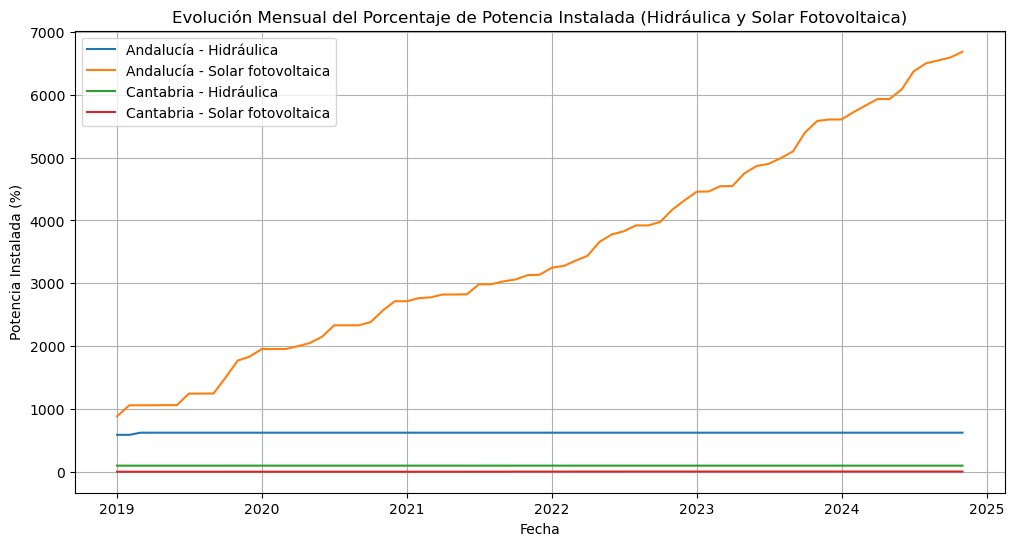

In [43]:
# parametros de la función
# obtener_datos (la función que he usado en el ejerciico 1)
regiones = {"Andalucía": "4", "Cantabria": "6"}
tecnologias = ["Hidráulica", "Solar fotovoltaica"]
start_year = 2019
end_year = 2024
df_potencia_instalada = evolucion_potencia_instalada_por_tecnologia(obtener_datos, regiones, tecnologias, start_year, end_year)

In [44]:
df_potencia_instalada

,fecha,potencia_instalada,tecnologia,region
0,2018-12-31 23:00:00+00:00,589.193,Hidráulica,Andalucía
1,2019-01-31 23:00:00+00:00,589.193,Hidráulica,Andalucía
2,2019-02-28 23:00:00+00:00,623.288,Hidráulica,Andalucía
3,2019-03-31 22:00:00+00:00,623.288,Hidráulica,Andalucía
4,2019-04-30 22:00:00+00:00,623.288,Hidráulica,Andalucía
...,...,...,...,...
279,2024-06-30 22:00:00+00:00,5.105,Solar fotovoltaica,Cantabria
280,2024-07-31 22:00:00+00:00,5.105,Solar fotovoltaica,Cantabria
281,2024-08-31 22:00:00+00:00,5.105,Solar fotovoltaica,Cantabria
282,2024-09-30 22:00:00+00:00,5.105,Solar fotovoltaica,Cantabria


In [45]:
# Cantabria no ha tenido inversiónes hidraulicas ni solares, y Andalucia ha tenido una increíble inversión solar.

5a pregunta

In [47]:
def precios_horarios_kwh_y_mwh() -> pd.DataFrame:
    """
    Obtiene y muestra un grafico de los precios tanto en EUR/MWh como en EUR/kWh.
    
    return: df con los datos obtenidos.
    """
    url_complemento = ('mercados/precios-mercados-tiempo-real?start_date=2024-07-05T00:00'
                        +'&end_date=2024-07-12T23:59&time_trunc=hour')
    datos = obtener_datos(url_complemento)
    
    if datos and 'included' in datos:
        # Saco los datos anidados en el json
        registros = []
        for item in datos['included']:
            if 'values' in item['attributes']:
                for valor in item['attributes']['values']:
                    registros.append({
                        'fecha': valor['datetime'],
                        'precio_mwh': valor['value'],
                        'precio_kwh': valor['value'] / 1000,  # convierto de MWh kWh
                        'tipo': item['attributes']['title']
                    })

        # meto en el df los datos sacados
        df = pd.DataFrame(registros)
        df['fecha'] = pd.to_datetime(df['fecha'])

        # grafico con datos en bruto en EUR/MWh
        plt.figure(figsize=(12, 6))
        for tipo, data in df.groupby('tipo'):
            plt.plot(data['fecha'], data['precio_mwh'], label=f"{tipo} (EUR/MWh)")
        plt.xlabel('Fecha y Hora')
        plt.ylabel('Precio (EUR/MWh)')
        plt.title('Evolucion de Precios (EUR/MWh) 5 al 12 de Julio 2024')
        plt.legend()
        plt.grid(True)
        plt.show()

        # grafico con datos para el publico general en EUR/kWh
        plt.figure(figsize=(12, 6))
        for tipo, data in df.groupby('tipo'):
            plt.plot(data['fecha'], data['precio_kwh'], label=f"{tipo} (EUR/kWh)")
        plt.xlabel('Fecha y Hora')
        plt.ylabel('Precio (EUR/kWh)')
        plt.title('Evolucion de Precios (EUR/kWh) 5 al 12 de Julio 2024')
        plt.legend()
        plt.grid(True)
        plt.show()

        return df
    else:
        print("No se recibieron datos validos.")
        return pd.DataFrame()


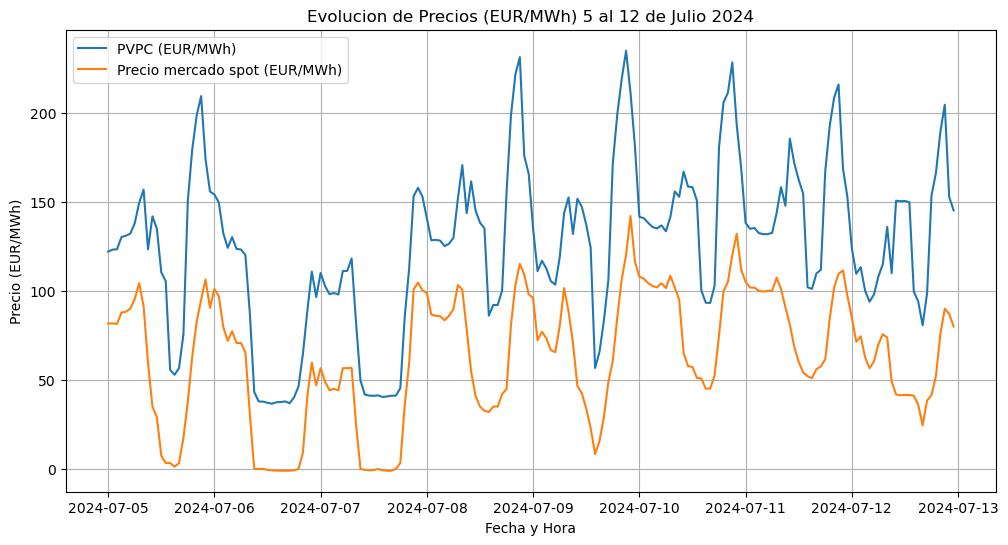

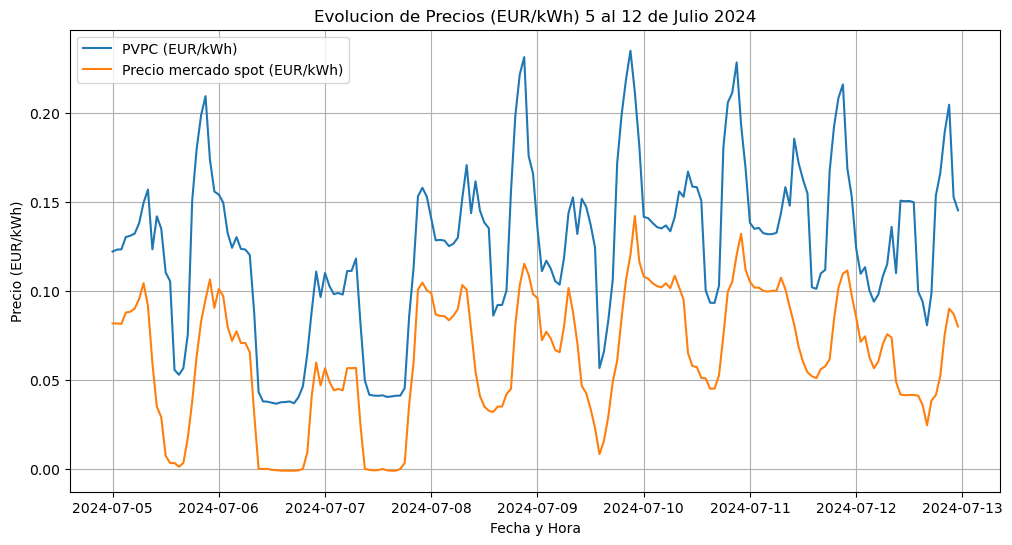

In [48]:
df_precios_horarios = precios_horarios_kwh_y_mwh()

In [49]:
df_precios_horarios

,fecha,precio_mwh,precio_kwh,tipo
0,2024-07-05 00:00:00+02:00,122.01,0.12201,PVPC
1,2024-07-05 01:00:00+02:00,123.09,0.12309,PVPC
2,2024-07-05 02:00:00+02:00,123.26,0.12326,PVPC
3,2024-07-05 03:00:00+02:00,130.15,0.13015,PVPC
4,2024-07-05 04:00:00+02:00,130.87,0.13087,PVPC
...,...,...,...,...
379,2024-07-12 19:00:00+02:00,52.20,0.05220,Precio mercado spot
380,2024-07-12 20:00:00+02:00,75.58,0.07558,Precio mercado spot
381,2024-07-12 21:00:00+02:00,89.93,0.08993,Precio mercado spot
382,2024-07-12 22:00:00+02:00,87.00,0.08700,Precio mercado spot


6a pregunta

In [51]:
def precio_medio_diario_marzo() -> pd.DataFrame:
    """
    Obtiene y muestra un grafico de los precios tanto en EUR/MWh como en EUR/kWh para mar/24
    
    return: df con los datos obtenidos.
    """
    url_complemento = ('mercados/precios-mercados-tiempo-real?start_date=2024-03-01T01:00'
                        +'&end_date=2024-03-31T23:59&time_trunc=hour')
    datos = obtener_datos(url_complemento)
    
    if datos and 'included' in datos:
        # Saco los datos anidados en el json
        registros = []
        for item in datos['included']:
            if 'values' in item['attributes']:
                for valor in item['attributes']['values']:
                    registros.append({
                        'fecha': valor['datetime'],
                        'precio_mwh': valor['value'],
                        'precio_kwh': valor['value'] / 1000,  # convierto de MWh kWh
                        'tipo': item['attributes']['title']
                    })

        # df a partir de los registros
        df = pd.DataFrame(registros)
        df['fecha'] = pd.to_datetime(df['fecha'], utc=True)

        # calculo el precio medio diario para mwh y kwh
        df['fecha_diaria'] = df['fecha'].dt.date
        df_diario = df.groupby('fecha_diaria').agg(
            precio_medio_mwh=('precio_mwh', 'mean'),
            precio_medio_kwh=('precio_kwh', 'mean')
        ).reset_index()
        df_diario['fecha_diaria'] = pd.to_datetime(df_diario['fecha_diaria'])

        # EUR/MWh
        plt.figure(figsize=(24, 6))
        plt.plot(df_diario['fecha_diaria'], df_diario['precio_medio_mwh'], label="Precio Medio Diario (EUR/MWh)")
        plt.xlabel('Fecha')
        plt.ylabel('Precio Medio (EUR/MWh)')
        plt.title('Evolución del Precio Medio Diario Marzo 2024 (EUR/MWh)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.show()

        # EUR/kWh
        plt.figure(figsize=(22, 6))
        plt.plot(df_diario['fecha_diaria'], df_diario['precio_medio_kwh'], label="Precio Medio Diario (EUR/kWh)")
        plt.xlabel('Fecha')
        plt.ylabel('Precio Medio (EUR/kWh)')
        plt.title('Evolución del Precio Medio Diario Marzo 2024 (EUR/MWh)')
        plt.xticks(rotation=45)  
        plt.legend()
        plt.grid(True)
        plt.show()

        return df_diario
    else:
        print("No se recibieron datos validos.")
        return pd.DataFrame()


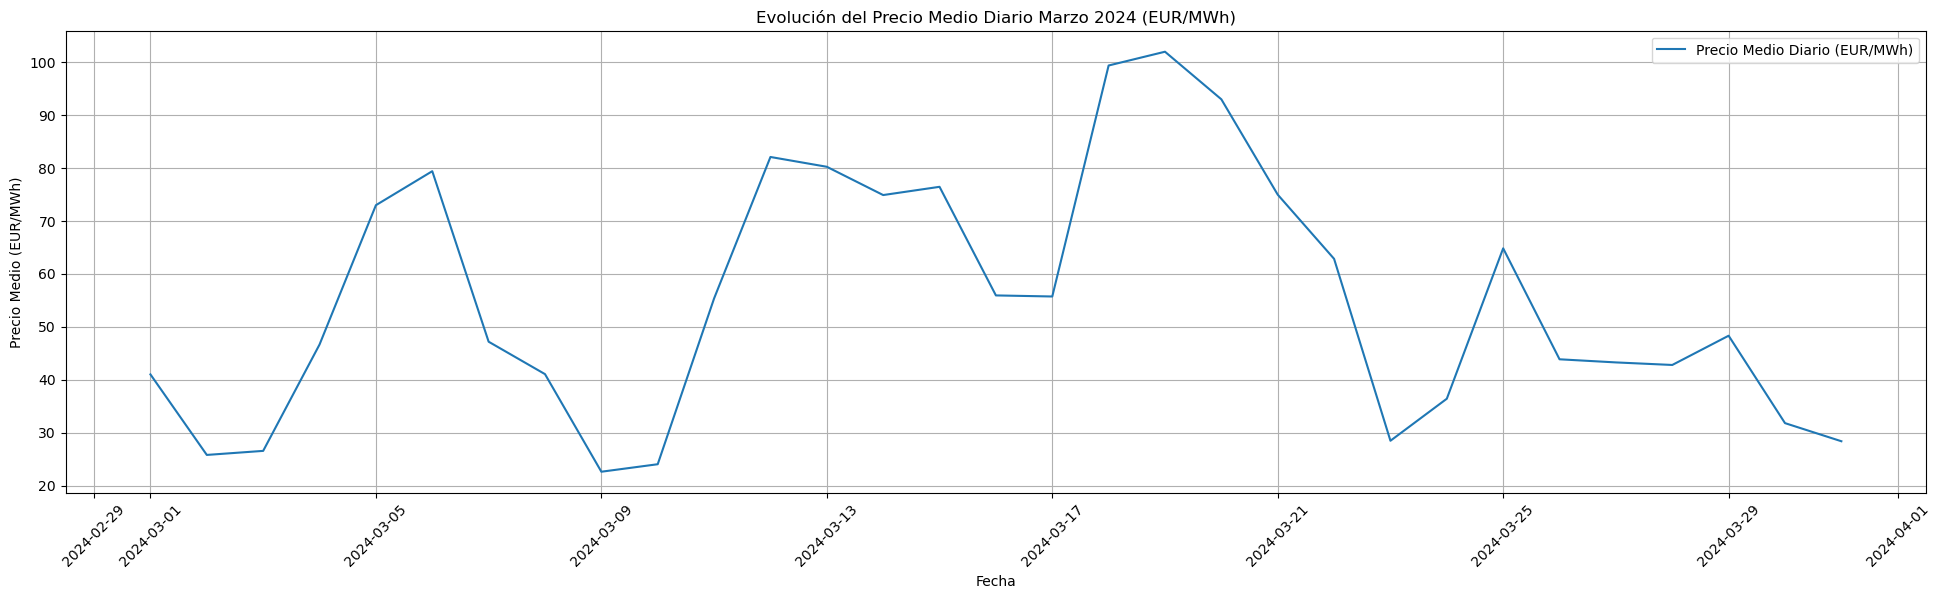

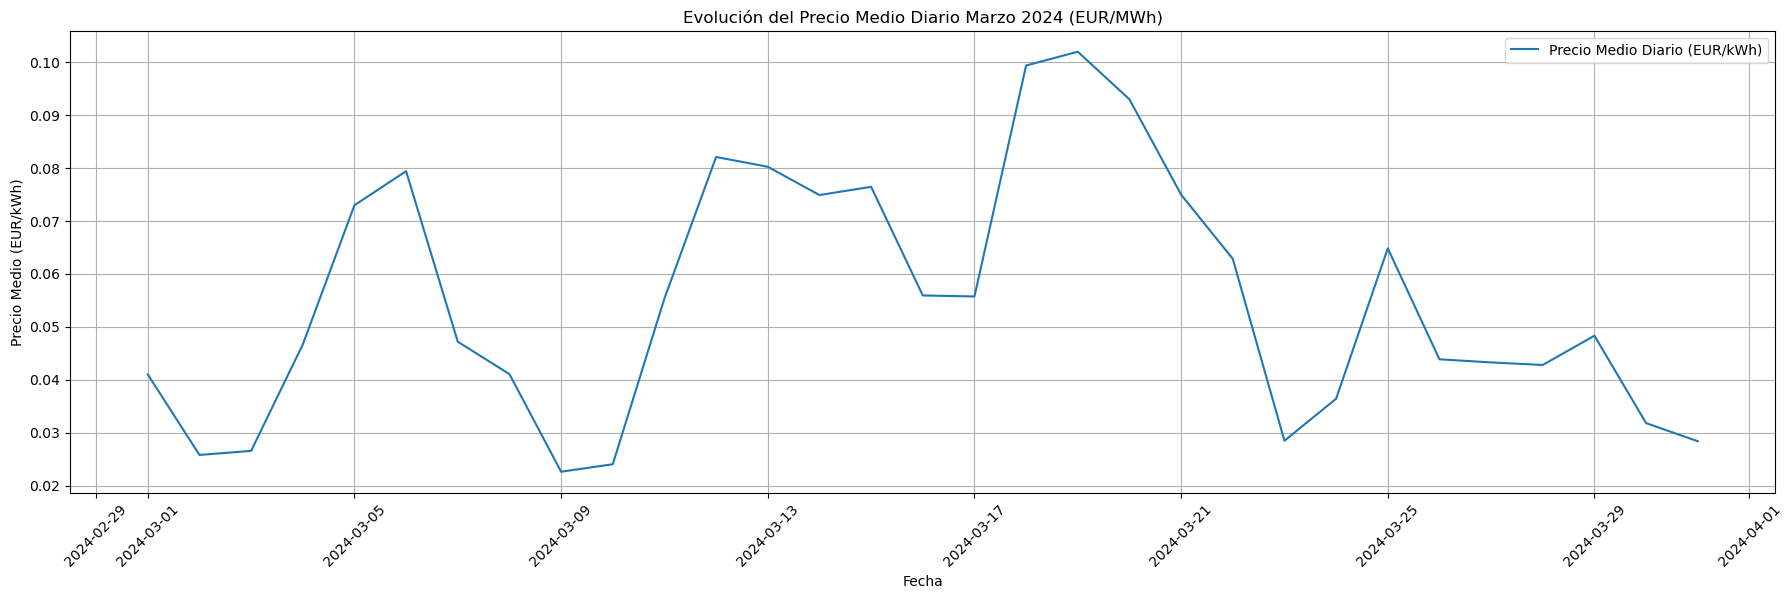

In [52]:
df_precio_medio_marzo = precio_medio_diario_marzo()

In [53]:
df_precio_medio_marzo


,fecha_diaria,precio_medio_mwh,precio_medio_kwh
0,2024-03-01,41.001042,0.041001
1,2024-03-02,25.783125,0.025783
2,2024-03-03,26.547917,0.026548
3,2024-03-04,46.648750,0.046649
4,2024-03-05,72.983125,0.072983
5,2024-03-06,79.409375,0.079409
6,2024-03-07,47.182500,0.047182
7,2024-03-08,41.054583,0.041055
8,2024-03-09,22.608958,0.022609
9,2024-03-10,24.026458,0.024026


7a pregunta

In [55]:
def mix_generacion_marzo() -> pd.DataFrame:
    """
    Obtiene y muestra el mix de generación en porcentaje para marzo de 2024, además de hacer 
    un grafico con las energías más relevantes en porcentaje diario.
    
    return: DataFrame con los datos del mix de generación en porcentaje.
    """
    url_complemento = ('generacion/estructura-generacion?start_date=2024-03-01T00:00'
                       '&end_date=2024-03-31T23:59&time_trunc=day')
    datos = obtener_datos(url_complemento)
    
    if datos and 'included' in datos:
        # sacar los datos de generación y convertir a porcentaje
        registros = []
        for item in datos['included']:
            tecnologia = item['attributes']['title']
            if tecnologia in ["Hidráulica", "Solar fotovoltaica", "Eólica", "Nuclear", "Carbón"]:  # filtro
                for valor in item['attributes']['values']:
                    registros.append({
                        'fecha': valor['datetime'],
                        'tecnologia': tecnologia,
                        'porcentaje': valor['percentage'] * 100
                    })

        # df a partir de los registros
        df_generacion = pd.DataFrame(registros)
        df_generacion['fecha'] = pd.to_datetime(df_generacion['fecha'], utc=True)
        df_generacion['fecha_diaria'] = df_generacion['fecha'].dt.date

        # Agrupar por fecha y tecnología
        df_diario = df_generacion.groupby(['fecha_diaria', 'tecnologia']).agg(
            porcentaje=('porcentaje', 'mean')
        ).reset_index()
        df_diario['fecha_diaria'] = pd.to_datetime(df_diario['fecha_diaria'])

        # grafico del mix de generación en porcentaje para cada tecnología relevante
        plt.figure(figsize=(14, 8))
        for tecnologia in df_diario['tecnologia'].unique():
            data_tecnologia = df_diario[df_diario['tecnologia'] == tecnologia]
            plt.plot(data_tecnologia['fecha_diaria'], data_tecnologia['porcentaje'], label=tecnologia + " (%)")
        
        plt.xlabel('Fecha')
        plt.ylabel('Porcentaje de Generación (%)')
        plt.title('Evolución del Mix de Generación - Marzo 2024')
        plt.xticks(rotation=45)
        plt.legend(loc="upper left")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        return df_diario
    else:
        print("No se recibieron datos válidos para el mix de generación.")
        return pd.DataFrame()


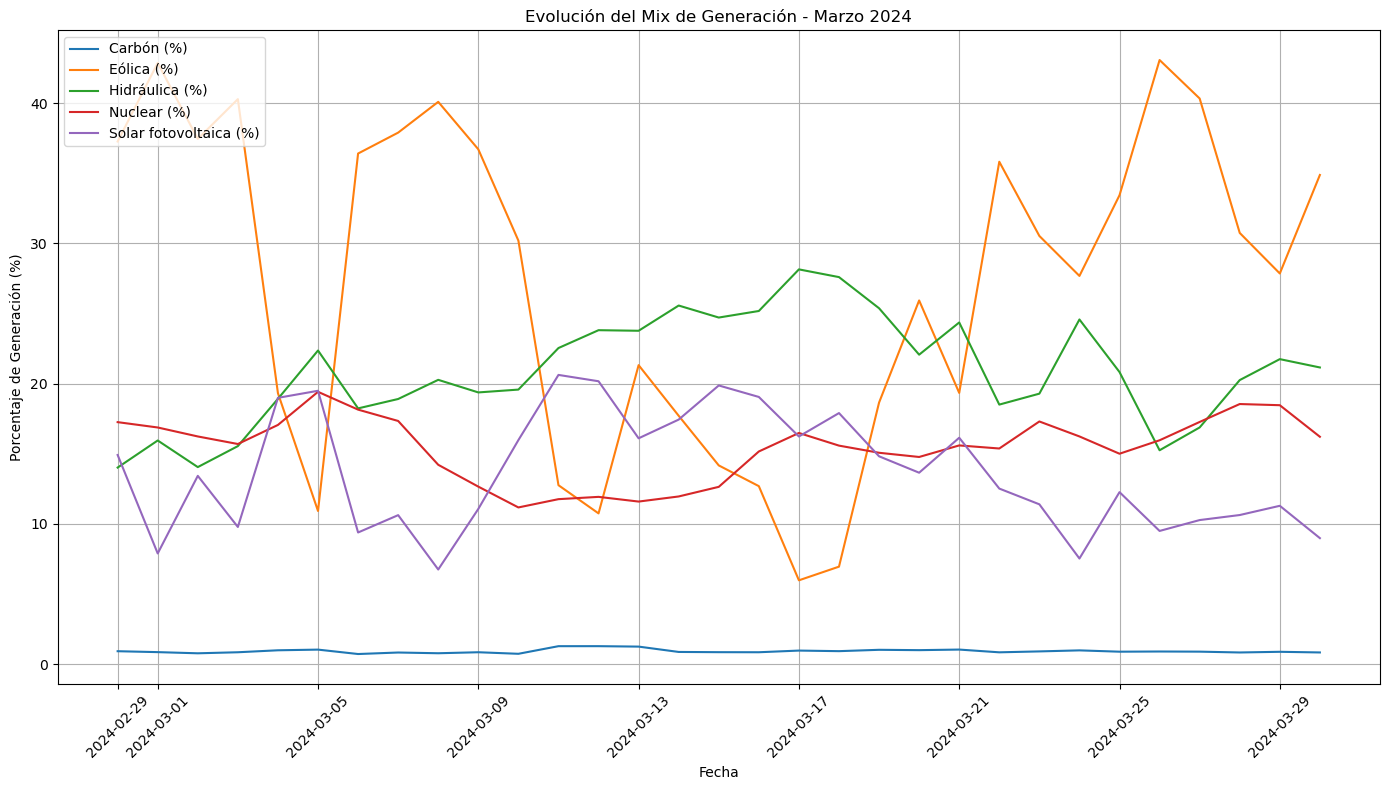

In [56]:
df_mix_generacion_marzo = mix_generacion_marzo()

### 1.2. APIs QUE NECESITAN REGISTRO

Para trabajar esta parte vamos a empezar trabajando un ejemplo con una de las APIs que ofrece la NASA para obtener patentes relativas a diferentes campos de la ciencia.

Para utilizar esta API, a diferencia del caso anterior, hace falta registrarse para obtener una clave (_API_KEY_) que va a necesitar ser incluida para realizar las diferentes solicitudes a la API.

Para registrarse (será necesario si queréis trabajar el ejemplo o reejecutarlo), es necesario que rellenéis el formulario que aparece en la parte 'Generate API Key' de la web: https://api.nasa.gov/ .
Cuando obtengáis el valor de la clave, tenedla localizable y copiadla en el notebook para definir la variable API_KEY.

Una vez obtenida la clave y revisada la documentación de la API, podemos empezar a realizar peticiones para obtener datos.

En el siguiente ejemplo, vamos a obtener las patentes relacionadas en la medicina que hay registradas.

**NOTA:** Antes de ejecutar el código de nuevo, será necesario añadir el valor del _API\_KEY_ que has obtenido

In [60]:
url_base='https://api.nasa.gov/techtransfer/'
API_KEY="qMzBLmbIaeKR714y4oCK4EE0ewtMTWFYXUBNcSQE"

# Opción 1
r1 = requests.get(url_base+"patent/", params = {"patent": "medicine","api_key":API_KEY})

# Opción 2
r2= requests.get('https://api.nasa.gov/techtransfer/patent/?engine&patent=medicine&api_key='+API_KEY)


r1 y r2 ofrecen la misma respuesta.

In [62]:
# Imprimir los resultados obtenidos
print(json.dumps(r1.json(), indent=4))

{
    "results": [
        [
            "59fa144f9600025c4c39485a",
            "LAR-TOPS-248",
            "Non-invasive Intracranial Pressure Measurement",
            "An acknowledged objective of critical care medicine is a timely, accurate, readily deployable, cost-effective and, importantly, safe means of assessing and/or monitoring critical aspects/parameters of patient condition such as intracranial pressure.  However, ICP monitoring is complicated by a large set of variables related to the patients themselves -- presented symptoms, circumstances, and related information indicating such measurement; and relevant accompanying issues. These conditions and the various combinations thereof present attending physicians with the choice of many alternatives regarding key parameters, including but not limited to urgency, availability, appropriability, and accuracy to a minimum standard.  Cost, complexity, ease of use and other issues are also meaningful factors, but the bottom line fo

#### **Ejercicio Práctico 2** (Imagen del día de la NASA)

La NASA en la página web  [Astronomy Picture of the Day](https://apod.nasa.gov/apod/astropix.html) ofrece una imagen distinta cada dia del año.

En este ejercició se pide al alumno obtener los datos relativos a las imágenes que fueron "Imagen del día" para cada una de las siguientes especificaciones:


1. Obtener un dataframe de 1 fila que contenga la información de la imagen del día en el que se está haciendo la práctica.

2. Obtener un dataframe de 1 fila que contenga la información de la imagen del día del último cumpleaños del estudiante (2023 o 2024).

3. Obtener un dataframe que contenga las imagenes del día de todos los días comprendidos entre el intervalo de tiempo introducido por teclado por el usuario. Una vez implementado el código, comprobar y mostrar los resultados para el periodo comprendido entre 10 y 19 de marzo de 2024.
>NOTA: Para facilitar la introducción de datos por teclado, utilizar la función input.


Para la realización de las solicitudes correspondientes, el alumno deberá revisar las especificaciones de la API, buscándola en la parte de _Browse APIs_ de la web https://api.nasa.gov/ y plantear las solicitudes correspondientes.

**El resultado debe mostrarse en forma de dataframe donde las columnas sean los campos "date", "explanation", "title", y "url" que devuelve la consulta y cada fila se corresponda con la imagen asociada a cada mes/día.** Adicionalmente, en la columna url el enlace de la imagen deberá ser sustituido por la imagen misma. Para ello, os recomendamos que utilizeis la función que os facilitamos donde se utiliza la librería HTML.  

In [65]:
# Función para mostrar las imagenes dentro de un dataframe en un protocolo HTML
from IPython.core.display import HTML

def path_to_image_html(path):
    return '<img src="'+ path + '" width="1000" >'

# Código para llamar correctamente la función (DATAFRMAE = Dataframe de trabajo)
#HTML(DATAFRAME.to_html(escape=False ,formatters=dict(imagen=path_to_image_html)))

Definir librerías, url_base, API_KEY

In [67]:
from datetime import datetime  


url_base = "https://api.nasa.gov/planetary/apod"

Pregunta 1

In [69]:
def imagen_del_dia_actual() -> pd.DataFrame:
    params = {"api_key": API_KEY}
    respuesta = requests.get(url_base, params=params)
    data = respuesta.json()
    
    df = pd.DataFrame([{
        'date': data['date'],
        'explanation': data['explanation'],
        'title': data['title'],
        'url': data['url']
    }])
    
    return HTML(df.to_html(escape=False, formatters=dict(url=path_to_image_html)))


In [70]:
print("Imagen del día actual:")
display(imagen_del_dia_actual())

Imagen del día actual:


,date,explanation,title,url
0,2024-11-12,"How was the Crescent Nebula created? Looking like an emerging space cocoon, the Crescent Nebula, visible in the center of the featured image, was created by the brightest star in its center. A leading progenitor hypothesis has the Crescent Nebula beginning to form about 250,000 years ago. At that time, the massive central star had evolved to become a Wolf-Rayet star (WR 136), shedding its outer envelope in a strong stellar wind, ejecting the equivalent of our Sun's mass every 10,000 years. This wind impacted surrounding gas left over from a previous phase, compacting it into a series of complex shells, and lighting it up. The Crescent Nebula, also known as NGC 6888, lies about 4,700 light-years away in the constellation of Cygnus. Star WR 136 will probably undergo a supernova explosion sometime in the next million years. Jigsaw Challenge: Astronomy Puzzle of the Day",NGC 6888: The Crescent Nebula,


Pregunta 2

In [72]:
def imagen_en_cumpleanos(fecha_cumple: str) -> pd.DataFrame:
    params = {"api_key": API_KEY, "date": fecha_cumple}
    respuesta = requests.get(url_base, params=params)
    data = respuesta.json()
    
    df = pd.DataFrame([{
        'date': data['date'],
        'explanation': data['explanation'],
        'title': data['title'],
        'url': data['url']
    }])
    
    return HTML(df.to_html(escape=False, formatters=dict(url=path_to_image_html)))


In [73]:
fecha_cumpleanos = "2024-06-19"
print(f"Imagen del día en el cumpleaños del {fecha_cumpleanos}:")
display(imagen_en_cumpleanos(fecha_cumpleanos))


Imagen del día en el cumpleaños del 2024-06-19:


,date,explanation,title,url
0,2024-06-19,"Do dragons fight on the altar of the sky? Although it might appear that way, these dragons are illusions made of thin gas and dust. The emission nebula NGC 6188, home to the glowing clouds, is found about 4,000 light years away near the edge of a large molecular cloud, unseen at visible wavelengths, in the southern constellation Ara (the Altar). Massive, young stars of the embedded Ara OB1 association were formed in that region only a few million years ago, sculpting the dark shapes and powering the nebular glow with stellar winds and intense ultraviolet radiation. The recent star formation itself was likely triggered by winds and supernova explosions from previous generations of massive stars, that swept up and compressed the molecular gas. This impressively detailed image spans over 2 degrees (four full Moons), corresponding to over 150 light years at the estimated distance of NGC 6188.",NGC 6188: Dragons of Ara,


Pregunta 3

In [75]:
def imagenes_en_intervalo_con_input() -> pd.DataFrame:
    while True:
        fecha_inicio = input("Introduce fecha de inicio (YYYY-MM-DD): ")
        try:
            fecha_inicio_dt = datetime.strptime(fecha_inicio, "%Y-%m-%d")
            break
        except ValueError:
            print("Fecha no valida. Usa el formato YYYY-MM-DD.")

    # Validación de la fecha de fin
    while True:
        fecha_fin = input("Introduce fecha de fin (YYYY-MM-DD): ")
        try:
            fecha_fin_dt = datetime.strptime(fecha_fin, "%Y-%m-%d")
            if fecha_fin_dt >= fecha_inicio_dt:
                break
            else:
                print("Fecha de fin debe ser igual o posterior a fecha de inicio.")
        except ValueError:
            print("Fecha no valida. Usa el formato YYYY-MM-DD.")

    # parametros
    params = {
        "api_key": API_KEY,
        "start_date": fecha_inicio,
        "end_date": fecha_fin
    }
    respuesta = requests.get(url_base, params=params)
    data = respuesta.json()
    
    registros = []
    for item in data:
        registros.append({
            'date': item['date'],
            'explanation': item['explanation'],
            'title': item['title'],
            'url': item['url']
        })
    df = pd.DataFrame(registros)
    return HTML(df.to_html(escape=False, formatters=dict(url=path_to_image_html)))

In [76]:
print("Imágenes en un intervalo de fechas especificado por el usuario:")
display(imagenes_en_intervalo_con_input())

Imágenes en un intervalo de fechas especificado por el usuario:


Introduce fecha de inicio (YYYY-MM-DD):  2024-03


Fecha no valida. Usa el formato YYYY-MM-DD.


Introduce fecha de inicio (YYYY-MM-DD):  holaaa


Fecha no valida. Usa el formato YYYY-MM-DD.


Introduce fecha de inicio (YYYY-MM-DD):  2024-03-10
Introduce fecha de fin (YYYY-MM-DD):  2024-03-01


Fecha de fin debe ser igual o posterior a fecha de inicio.


Introduce fecha de fin (YYYY-MM-DD):  2024-03-19


,date,explanation,title,url
0,2024-03-10,"Would you go to the end of the world to see a total eclipse of the Sun? If you did, would you be surprised to find someone else there already? In 2003, the Sun, the Moon, Antarctica, and two photographers all lined up in Antarctica during an unusual total solar eclipse. Even given the extreme location, a group of enthusiastic eclipse chasers ventured near the bottom of the world to experience the surreal momentary disappearance of the Sun behind the Moon. One of the treasures collected was the featured picture -- a composite of four separate images digitally combined to realistically simulate how the adaptive human eye saw the eclipse. As the image was taken, both the Moon and the Sun peeked together over an Antarctic ridge. In the sudden darkness, the magnificent corona of the Sun became visible around the Moon. Quite by accident, another photographer was caught in one of the images checking his video camera. Visible to his left are an equipment bag and a collapsible chair. A more easily visible solar eclipse will occur in just under four weeks and be visible from a long, thin swath of North America.",A Total Eclipse at the End of the World,
1,2024-03-11,"What glows in the night? This night featured a combination of usual and unusual glows. Perhaps the most usual glow was from the Moon, a potentially familiar object. The full Moon's nearly vertical descent results from the observer being near Earth's equator. As the Moon sets, air and aerosols in Earth's atmosphere preferentially scatter out blue light, making the Sun-reflecting satellite appear reddish when near the horizon. Perhaps the most unusual glow was from the bioluminescent plankton, likely less familiar objects. These microscopic creatures glow blue, it is thought, primarily to surprise and deter predators. In this case, the glow was caused primarily by plankton-containing waves crashing onto the beach. The image was taken on Soneva Fushi Island, Maldives just over one year ago. Your Sky Surprise: What picture did APOD feature on your birthday? (post 1995)",A Full Plankton Moon,
2,2024-03-12,"What's that over the horizon? What may look like a strangely nearby galaxy is actually a normal rocket's exhaust plume -- but unusually backlit. Although the SpaceX Falcon 9 rocket was launched from Vandenberg Space Force Base in California, USA, its burned propellant was visible over a much wider area, with the featured photograph being taken from Akureyri, Iceland. The huge spaceship was lifted off a week ago, and the resulting spectacle was captured soon afterward with a single 10-second smartphone exposure, before it quickly dissipated. Like noctilucent clouds, the plume's brightness is caused by the Twilight Effect, where an object is high enough to be illuminated by the twilight Sun, even when the observer on the ground experiences the darkness of night. The spiral shape is caused by the Falcon rocket reorienting to release satellites in different directions. Stars and faint green and red aurora appear in the background of this extraordinary image.",A Galaxy-Shaped Rocket Exhaust Spiral,
3,2024-03-13,"A broad expanse of glowing gas and dust presents a bird-like visage to astronomers from planet Earth, suggesting its popular moniker: the Seagull Nebula. This portrait of the cosmic bird covers a 2.5-degree wide swath across the plane of the Milky Way, near the direction of Sirius, alpha star of the constellation of the Big Dog (Canis Major). Of course, the region includes objects with other catalog designations: notably NGC 2327, a compact, dusty emission and reflection nebula with an embedded massive star that forms the bird's head. Likely part of a larger shell structure swept up by successive supernova explosions, the broad Seagull Nebula is cataloged as Sh2-296 and IC 2177. The prominent bluish arc below and right of center is a bow shock from runaway star FN Canis Majoris. Dominated by the reddish glow of atomic hydrogen, this 

## 2. WEB SCRAPING CON BEAUTIFUL SOAP


**Beautiful Soup** es una librería de Python para extraer datos de un documento HTML. Esta se basa en analizar el HTML con la ayuda de un parser.

Un **parser**, en el contexto del web scraping, es un programa diseñado para recorrer la estructura de árbol o de componentes anidados de un documento HTML de forma que se pueda identificar y acceder fácilmente los diferentes elementos del mismo.

Hay diferentes parsers disponibles que pueden ser utilizados y seleccionados para ser utilizados con Beautiful Soup.

- 'html.parser'
- 'lxml' (Es el mejor valorado por BeautifulSoap en la mayoría de los casos)
- 'html5lib'

En caso de no ser especificado ningún parser, Beautiful Soup escoge el que considera más adecuado.

Una vez creado el objeto BeautifulSoap, es recomendable abrir el html generado para comprobar que se ha _parseado_ correctamente. Es decir, que se ha recogido correctamente la estructura del documento HTML.




Los *métodos más útiles* de esta librería, con los que vamos a trabajar en esta parte son:

- **find(“p”, class=“footer-text”)**: extrae el primera etiqueta párrafo con clase = “footer-text”
- **find_all(“a”)**: extrae todos los links de la página
-**tag.attrs**: devuelve un diccionario con todos los atributos de la etiqueta.
-**tag.text**: devuelve todo el texto que contiene la etiqueta
-**tag.contents**: devuelve una lista de todos los elementos hijo dentro de la etiqueta.

Para conocer más funcionalidades de la librería, se recomienda que visitéis la siguiente página donde aparece su documentación:  https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Los **principales pasos** que debemos seguir en un proyecto de web scraping con BeautifulSoup son los siguientes:

1. Cargar las librerías que se van a utilizar
2. Inspeccionar la página que se desee scrapear (*)
3.  Escoger el parser
4. Crear el objeto BeaurifulSoup
5. Exportar el HTML a un archivo para comprobar que el objeto BeautifulSoup se ha creado correctamente y/o dónde está la información de interés.
6. Determinar cuáles son las etiquetas del documento HTML que contiene la información que nos interesa scrapear.
7. Aplicar los métodos disponibles en la librería BeautifulSoup para obtener el contenido deseado
8. Organizar el contenido _scrapeado_ en la estructura deseada o más conveniente de acuerdo con los datos obtenidos.




---
> (\*) Inspeccionar la página que se desee scrapear

**Para inspeccionar una página web se recomienda utilizar el inspector de páginas web disponible en los navegadores.**

En el caso de google Chrome, se puede acceder a él mediante haciendo _click derecho -> inspector_ en la página web que queremos inspeccionar.

Una vez abierto el inspector, abrir la pestaña "Developer". Desde aquí se puede navegar por el documento HTML, buscar e identificar los elementos y etiquetas donde se encuentra el contenido que se desea _scaprear_.

_Ejemplo del inspector de páginas web:_

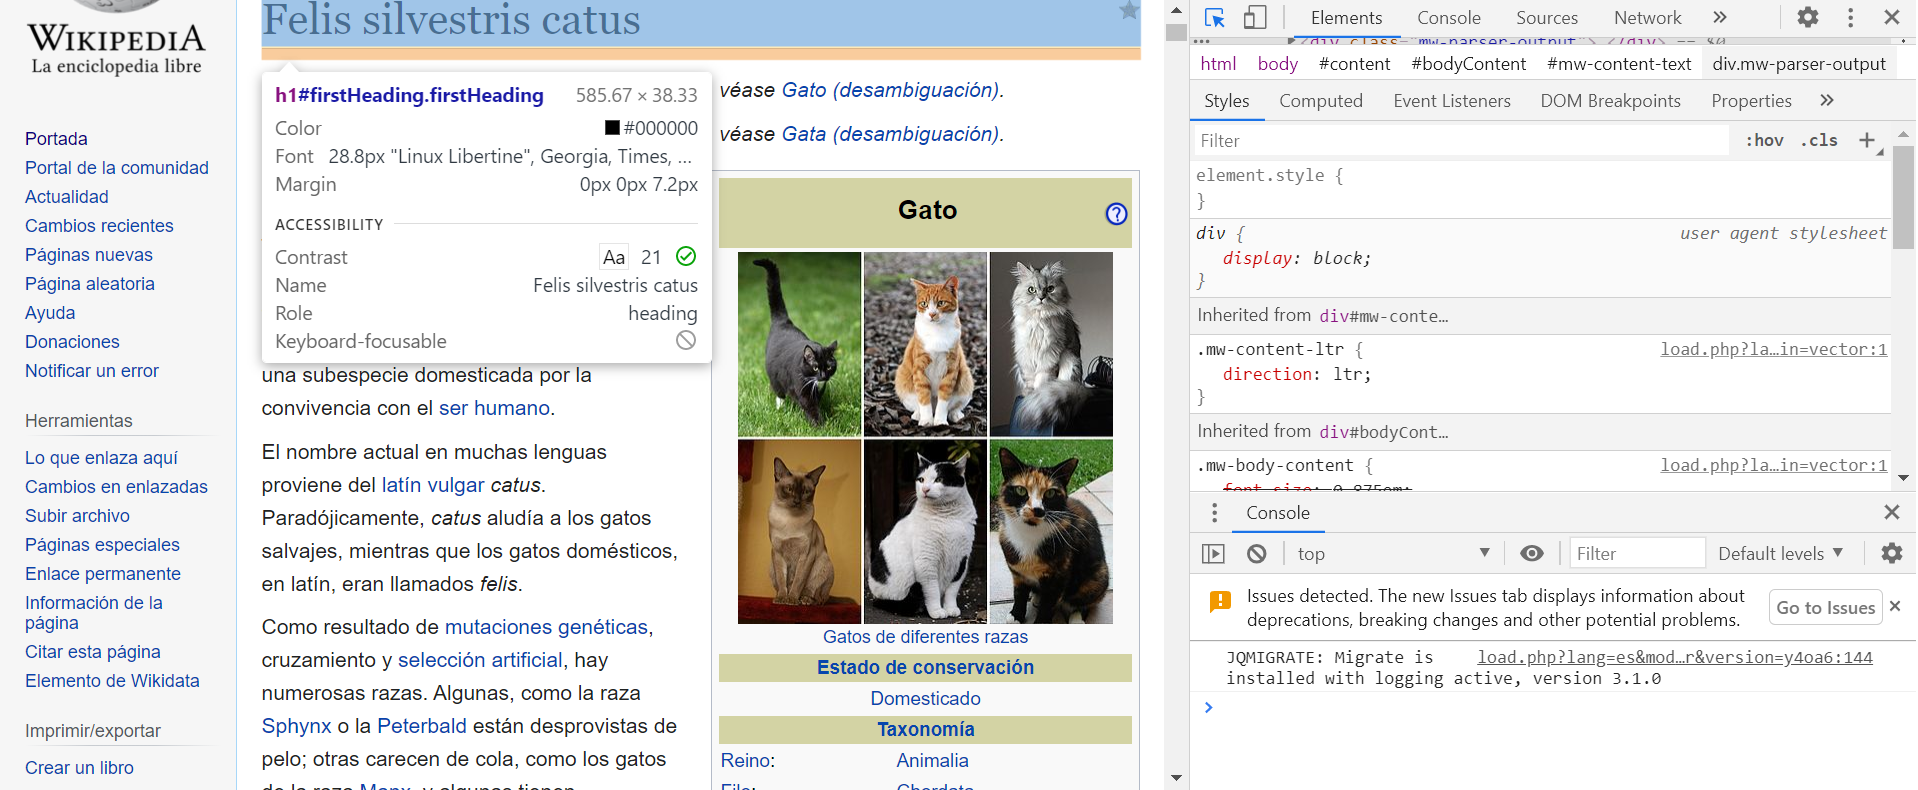


---








Para empezar a trabajar esta parte, vamos a ver cómo scrapear contenido de la Wikipedia, concretamente, vamos a obtener la lista de las festividades más relevantes de España, los enlaces donde podemos encontrar mayor información y una breve descripción de las mismas.


Teniendo en cuenta los ejemplos explicativos, el estudiante deberá realizar **los 3 ejercicios prácticos** que se proponen a continuación.

In [84]:
# Cargar librerías
!pip install beautifulsoup4 lxml
import lxml
import requests
from bs4 import BeautifulSoup


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [85]:
# Definir la url de la web que se desee scrapear
url_base = "https://es.wikipedia.org/wiki/Turismo_en_Espa%C3%B1a"

# Hacer la solicitud
respuesta = requests.get(url_base)
respuesta.status_code

200

In [86]:
# Extraer el HTML
html = respuesta.content

# Convertir HTML a BeautifulSoup object.
soup = BeautifulSoup(html, "html.parser")

# Exportiar el HTML a un archivo
with open('Wiki_respuesta.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

En el explorador de archivos del Collaboratory (desplegar el menú de la izquierda), podemos abrimos el fichero generado _Wiki_respuesta.html_ para revisar la estructura de la página web.

Este ejercicio junto con la el inspector de paginas web disponible en el navegador, nos permitirá localizar dónde se encuentra la información que nos interesa (Festivos de España).


Si nos fijamos, podemos ver que la información de interés está contenida en los enlaces (\<a\>) del último párrafo (\<p\>).

In [88]:
#Obtener todos los links del último párrafo
links=soup.find_all('p')[-1].find_all('a')
links

[<a class="mw-redirect" href="/wiki/Fiestas_de_Inter%C3%A9s_Tur%C3%ADstico_Internacional_(Espa%C3%B1a)" title="Fiestas de Interés Turístico Internacional (España)">Fiestas de Interés Turístico Internacional</a>,
 <a href="/wiki/Feria_de_Abril" title="Feria de Abril">Feria de Abril de Sevilla</a>,
 <a href="/wiki/Hogueras_de_Alicante" title="Hogueras de Alicante">Hogueras de Alicante</a>,
 <a href="/wiki/Feria_de_Albacete" title="Feria de Albacete">Feria de Albacete</a>,
 <a href="/wiki/Carnaval_de_Santa_Cruz_de_Tenerife" title="Carnaval de Santa Cruz de Tenerife">Carnaval de Santa Cruz de Tenerife</a>,
 <a href="/wiki/Sanfermines" title="Sanfermines">Sanfermines de Pamplona</a>,
 <a href="/wiki/Fiestas_del_Pilar" title="Fiestas del Pilar">Fiestas del Pilar de Zaragoza</a>,
 <a class="mw-redirect" href="/wiki/Semana_Santa_de_Sevilla" title="Semana Santa de Sevilla">Semana Santa de Sevilla</a>]

La url que aparece asociada a cada festividad es una url relativa. Por tanto, para obtener la dirección url completa podemos utilizar la función _urljoin_.

In [90]:
from urllib.parse import urljoin

# Extraer el nombre de la festividad (asociado con el atribut 'title' del elemento 'a')
nombre_links=[l.get('title') for l in links]

# Extraer el valor de la url relativa (asociada con el atribut 'href' del elemento 'a')
url_rel_links=[l.get('href') for l in links]

#Transformar los links relativos a absolutos
url_complet_links = [urljoin(url_base, url) for url in url_rel_links]

In [91]:
# Extraer solo las url que apuntan a Wikipedia (url internas)
links_int = [url for url in url_complet_links if 'wikipedia.org' in url]
links_int

['https://es.wikipedia.org/wiki/Fiestas_de_Inter%C3%A9s_Tur%C3%ADstico_Internacional_(Espa%C3%B1a)',
 'https://es.wikipedia.org/wiki/Feria_de_Abril',
 'https://es.wikipedia.org/wiki/Hogueras_de_Alicante',
 'https://es.wikipedia.org/wiki/Feria_de_Albacete',
 'https://es.wikipedia.org/wiki/Carnaval_de_Santa_Cruz_de_Tenerife',
 'https://es.wikipedia.org/wiki/Sanfermines',
 'https://es.wikipedia.org/wiki/Fiestas_del_Pilar',
 'https://es.wikipedia.org/wiki/Semana_Santa_de_Sevilla']

In [92]:
nombre_links

['Fiestas de Interés Turístico Internacional (España)',
 'Feria de Abril',
 'Hogueras de Alicante',
 'Feria de Albacete',
 'Carnaval de Santa Cruz de Tenerife',
 'Sanfermines',
 'Fiestas del Pilar',
 'Semana Santa de Sevilla']

Para poder obtener la breve descripción de cada una de las festividades asociadas a los links anteriores, vamos a scrapear el contenido de dichas urls y obtener la información contenida en el primer párrafo (asumimos que en él es dónde se hace la introducción del concepto). Para ello, construiremos un bucle que en cada iteración obtenga datos de cada url. Antes de cada solicitud al servidor esperaremos un segundo para controlar el tiempo y asegurarnos de que se puedan ejecutar correctamente las solicitudes.  

In [94]:
# Cargar la librería time
import time

In [95]:
# inicializar la lista donde se van a guardar los parrafos con la breve descripción
par_text = []

# Bucle para scrapear cada link
i = 0
for url in links_int:

    # wait for 1 second before each request
    time.sleep(1)

    # connect to every webpage
    p_resp = requests.get(url)

    # checking if the request is successful
    if p_resp.status_code == 200:            # OK!
        print('URL #{0}: {1}'.format(i+1,url))    # imprimir el numero de iteración junto con la url

    else:
        print('Status code {0}: Skipping URL #{1}: {2}'.format(p_resp.status_code, i+1, url)) #Imprimir el error
        i = i+1
        continue


    # obtener HTML
    p_html = p_resp.content

    # convertir HTML a objeto BeautifulSoup
    p_soup = BeautifulSoup(p_html, 'lxml')

    # obtener texto relativo al primer párrafo
    p_pars = p_soup.find("p").text

    # Añadir el párrafo a la lista de párrafos
    par_text.append(p_pars)

    # Incrementing the loop counter
    i = i+1

URL #1: https://es.wikipedia.org/wiki/Fiestas_de_Inter%C3%A9s_Tur%C3%ADstico_Internacional_(Espa%C3%B1a)
URL #2: https://es.wikipedia.org/wiki/Feria_de_Abril
URL #3: https://es.wikipedia.org/wiki/Hogueras_de_Alicante
URL #4: https://es.wikipedia.org/wiki/Feria_de_Albacete
URL #5: https://es.wikipedia.org/wiki/Carnaval_de_Santa_Cruz_de_Tenerife
URL #6: https://es.wikipedia.org/wiki/Sanfermines
URL #7: https://es.wikipedia.org/wiki/Fiestas_del_Pilar
URL #8: https://es.wikipedia.org/wiki/Semana_Santa_de_Sevilla


In [96]:
url_and_info = dict(zip(links_int, par_text))
url_and_info

{'https://es.wikipedia.org/wiki/Fiestas_de_Inter%C3%A9s_Tur%C3%ADstico_Internacional_(Espa%C3%B1a)': 'La declaración de Fiesta de Interés Turístico Internacional es una distinción de carácter honorífico que se concede en España por la Secretaría General de Turismo del Ministerio de Industria, Turismo y Comercio a las fiestas o acontecimientos que supongan manifestaciones de valores culturales y de tradición popular, con especial consideración a sus características etnológicas y que tengan una especial importancia como atractivo turístico.\n',
 'https://es.wikipedia.org/wiki/Feria_de_Abril': 'La Feria de Abril o Feria de Sevilla es una fiesta de primavera que se celebra anualmente en la ciudad de Sevilla (Comunidad autónoma de Andalucía, España), donde el público se reúne en un gran recinto denominado Real de la Feria, con calles con casetas efímeras, engalanadas con farolillos, por las que circulan jinetes y coches de caballo y por las que pasan diariamente unos 500\xa0000 visitantes.[

#### **Ejercicio Práctico 3** (Rotten Tomatoes & IMDb)

Tener una suscripción a una plataforma y no saber que ver es un problema común. Como la mayoría de vosotros ya conoceréis, existen diferentes páginas web que ofrecen información muy detallada y continuamente actualizada por usuarios sobre contenido audiovisual que ayuda a escoger cuál va a ser la siguiente película a ver.

Entre toda la multitud de información que se puede consultar, en este ejercicio nos vamos a centrar en conocer las mejores películas del 2024 según Rotten Tomatoes así como las mejores películas según IMDb para el mismo año. Posteriormente cruzaremos la información para ver si hay datos comunes.

- Rotten Tomatoes: https://editorial.rottentomatoes.com/guide/best-new-movies/
- IMDb: https://www.imdb.com/list/ls522499081/?sort=user_rating%2Cdesc/

Para el ejercicio se pide:

1. Obtener un DataFrame de las películas de Rotten Tomatoes. Mostrar el Dataframe.
2. Obtener un DataFrame de las películas de IMDb. Mostrar el Dataframe.
3. Con ambos DataFrames, cruzarlos por el título y mostrar qué películas hay en común.

Las características que se piden para el DataFrame de Rotten Tomatoes:
- Título
- Año
- Puntuación
- Director
- Crítica
- Sinopsis

Las características que se piden para el DataFrame de IMDb:
- Título
- Duración
- Año
- Puntuación
- url completa de la película (url_base + url_relativa)

La información scrapeada será organizada en un dataframe de forma que cada característica esté dispuesta en una columna.

>NOTAS:
>- Apoyarse en el ejemplo anterior de _Rotten Tomatoes_.
>- Inspeccionar la página web a scrapear.
>- Identificar las etiquetas que contienen la información que nos interesa.
>- Seleccionar el contenido que nos interesa.

Cargar librerías

In [100]:
import re

Pregunta 1

In [102]:
def obtener_peliculas_rotten_tomatoes() -> pd.DataFrame:
    base_url = "https://editorial.rottentomatoes.com/guide/best-new-movies/"
    pagina = 1
    max_paginas=2
    titulos, anos, puntuaciones, directores, criticas, sinopsis = [], [], [], [], [], []
    
    while pagina <= max_paginas:
        # Construir la URL de la pagina 2, si es la primera, no hay pagina
        url = f"{base_url}/{pagina}/" if pagina > 1 else base_url
        response = requests.get(url)
        
        # Si no se puede acceder a la página, salir
        if response.status_code != 200:
            print(f"Página {pagina} no encontrada. Finalizando scraping.")
            break
        
        soup = BeautifulSoup(response.text, "html.parser")
        peliculas = soup.find_all("div", class_="row countdown-item")
        for pelicula in peliculas:
            titulo_elemento = pelicula.find("h2", class_="article_movie_title") or pelicula.find("h2")
            if titulo_elemento:
                titulo_completo = titulo_elemento.get_text(strip=True)
                # Limpio el titulo y saco el año
                match_ano = re.search(r"\((\d{4})\)", titulo_completo)
                if match_ano:
                    ano = match_ano.group(1)
                    titulo = re.sub(r"\(\d{4}\)", "", titulo_completo).strip()
                else:
                    ano = "N/A"
                    titulo = titulo_completo

                # Remover puntuación al final del título (ejemplo: "100%")
                titulo = re.sub(r"\d{1,3}%$", "", titulo).strip()
            else:
                titulo = "N/A"
                ano = "N/A"

            # puntuación
            puntuacion_elemento = pelicula.find("span", class_="tMeterScore")
            puntuacion = puntuacion_elemento.get_text(strip=True) if puntuacion_elemento else "N/A"
            
            # sinopsis
            sinopsis_elemento = pelicula.find("div", class_="synopsis")
            sinopsis_texto = sinopsis_elemento.get_text(strip=True).replace("Synopsis:", "") if sinopsis_elemento else "N/A"
            
            # crítica
            critica_elemento = pelicula.find("div", class_="critics-consensus")
            critica_texto = critica_elemento.get_text(strip=True).replace("Critics Consensus:", "") if critica_elemento else "N/A"
            
            # director
            director_elemento = pelicula.find("div", class_="director")
            director_texto = director_elemento.get_text(strip=True).replace("Directed By:", "") if director_elemento else "N/A"
            
            titulos.append(titulo)
            anos.append(ano)
            puntuaciones.append(puntuacion)
            directores.append(director_texto)
            criticas.append(critica_texto)
            sinopsis.append(sinopsis_texto)
        
        # Pasar a la siguiente página
        pagina += 1

    # df con todos los datos
    df_rotten = pd.DataFrame({
        "Título": titulos,
        "Año": anos,
        "Puntuación": puntuaciones,
        "Director": directores,
        "Crítica": criticas,
        "Sinopsis": sinopsis
    })

    return df_rotten

In [103]:
df_rotten = obtener_peliculas_rotten_tomatoes()

In [104]:
df_rotten

,Título,Año,Puntuación,Director,Crítica,Sinopsis
0,All We Imagine as Light,2024,100%,Payal Kapadia,Capturing the here and now of modern India wit...,"The light, the lives, and the textures of cont..."
1,Nowhere Special,2020,100%,Uberto Pasolini,Focusing pragmatically on the ordinary human m...,When single father John is given only a few mo...
2,Girls Will Be Girls,2024,100%,Shuchi Talati,A deeply felt coming of age tale that gleans i...,In a strict boarding school nestled in the Him...
3,"LaRoy, Texas",2023,100%,Shane Atkinson,Distinguished by sharp writing and a talented ...,"Broke and depressed, Ray (John Magaro) is mist..."
4,Ghostlight,2024,99%,"Kelly O'Sullivan,Alex Thompson",A small film that elicits a huge emotional res...,When melancholic construction worker Dan (Keit...
...,...,...,...,...,...,...
151,Blitz,2024,79%,Steve McQueen,A tale of survival from director Steve McQueen...,"Sir Steve McQueen's ""Blitz"" follows the epic j..."
152,Blink Twice,2024,75%,Zoë Kravitz,A bold and memorable debut that thrusts Zoë Kr...,When tech billionaire Slater King (Channing Ta...
153,Drift,2023,74%,Anthony Chen,Thanks to stellar work from Cynthia Erivo and ...,Jacqueline (Two-Time Academy Award nominee Cyn...
154,Self Reliance,2023,73%,Jake Johnson,Debuting director Jake Johnson acquits himself...,When a middle-aged man (Jake Johnson) is invit...


Pregunta 2

In [106]:
def obtener_peliculas_imdb() -> pd.DataFrame:
    '''Funcion para extraer peliculas de imdb en un df'''
    url = "https://www.imdb.com/list/ls522499081/?sort=user_rating%2Cdesc/"
    headers = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_"+
        "7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.80 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "lxml")  # Usamos lxml como parser

    script_tag = soup.find("script", type="application/ld+json")
    json_data = json.loads(script_tag.string)

    peliculas = json_data["itemListElement"]
    peliculas_html = soup.find_all("div", class_="sc-5bc66c50-0 bZBaVw")

    titulos = []
    anos = []
    duraciones = []
    puntuaciones = []
    urls = []

    for index, pelicula in enumerate(peliculas):
        item = pelicula["item"]
        
        # Titulo en ingles
        titulo = item.get("name", "N/A")
        titulos.append(titulo)

        # Enlace
        url = item.get("url", "N/A")
        urls.append(url)

        # duracion
        duracion = item.get("duration", "N/A")
        if duracion.startswith("PT"):
            duracion = duracion[2:]
        duraciones.append(duracion)

        # Puntuación
        puntuacion = item.get("aggregateRating", {}).get("ratingValue", "N/A")
        puntuaciones.append(puntuacion)

        # Año
        ano = "N/A"
        if index < len(peliculas_html):
            ano_tag = peliculas_html[index].find("span", class_="sc-5bc66c50-6 OOdsw dli-title-metadata-item")
            if ano_tag:
                ano_texto = ano_tag.get_text(strip=True)
                ano = ano_texto[:4]  # Extrae solo los primeros 4 caracteres si es un año en formato "YYYY"
        anos.append(ano)

    # Creo df
    df_imdb = pd.DataFrame({
        "Título": titulos,
        "Año": anos,
        "Duración": duraciones,
        "Puntuación": puntuaciones,
        "URL": urls
    })

    return df_imdb

In [107]:
df_imdb = obtener_peliculas_imdb()
print("Películas de IMDb:")
print(df_imdb.head())

Películas de IMDb:
                         Título   Año Duración Puntuación  \
0                 The Beekeeper  2024    1H45M        6.3   
1                      Seon-san  2024      N/A        6.4   
2                   Terrifier 3  2024     2H5M        6.5   
3             Kinds of Kindness  2024    2H44M        6.5   
4  It&apos;s What&apos;s Inside  2024    1H43M        6.6   

                                      URL  
0  https://www.imdb.com/title/tt15314262/  
1  https://www.imdb.com/title/tt28225048/  
2  https://www.imdb.com/title/tt27911000/  
3  https://www.imdb.com/title/tt22408160/  
4  https://www.imdb.com/title/tt14577874/  


In [108]:
df_imdb

,Título,Año,Duración,Puntuación,URL
0,The Beekeeper,2024,1H45M,6.3,https://www.imdb.com/title/tt15314262/
1,Seon-san,2024,N/A,6.4,https://www.imdb.com/title/tt28225048/
2,Terrifier 3,2024,2H5M,6.5,https://www.imdb.com/title/tt27911000/
3,Kinds of Kindness,2024,2H44M,6.5,https://www.imdb.com/title/tt22408160/
4,It&apos;s What&apos;s Inside,2024,1H43M,6.6,https://www.imdb.com/title/tt14577874/
...,...,...,...,...,...
62,The Penguin,N/A,N/A,8.8,https://www.imdb.com/title/tt15435876/
63,Nosferatu,N/A,2H12M,N/A,https://www.imdb.com/title/tt5040012/
64,The Lord of the Rings: The War of the Rohirrim,N/A,2H14M,N/A,https://www.imdb.com/title/tt14824600/
65,Mufasa: The Lion King,N/A,2H,N/A,https://www.imdb.com/title/tt13186482/


Pregunta 3

In [110]:
def encontrar_coincidencias(df_rotten: pd.DataFrame,
                            df_imdb: pd.DataFrame) -> pd.DataFrame:
    df_comun = pd.merge(df_rotten, df_imdb, on="Título",
                        suffixes=("_Rotten", "_IMDb"),
                        how="inner")
    return df_comun

In [111]:
df_coincidencias = encontrar_coincidencias(df_rotten, df_imdb)

In [112]:
df_coincidencias

,Título,Año_Rotten,Puntuación_Rotten,Director,Crítica,Sinopsis,Año_IMDb,Duración,Puntuación_IMDb,URL
0,The Wild Robot,2024,98%,Christopher Sanders,"A simple tale told with great sophistication,T...",The epic adventure follows the journey of a ro...,N/A,1H42M,8.3,https://www.imdb.com/title/tt29623480/
1,His Three Daughters,2023,98%,Azazel Jacobs,Dealing with thorny family dynamics while rema...,From writer-director Azazel Jacobs (French Exi...,N/A,1H41M,7.2,https://www.imdb.com/title/tt28491891/
2,Anora,2024,97%,Sean Baker,Another marvelous chronicle of America's striv...,Sean Baker's Palme d'Or winner ANORA is an aud...,N/A,2H19M,8.2,https://www.imdb.com/title/tt28607951/
3,Rebel Ridge,2024,96%,Jeremy Saulnier,An intelligent and gripping vehicle for Aaron ...,Terry Richmond enters the town of Shelby Sprin...,2024,2H11M,6.8,https://www.imdb.com/title/tt11301886/
4,Hit Man,2023,95%,Richard Linklater,A deceptively dark thriller that's also loaded...,Oscar-nominated director Richard Linklater's s...,2023,1H55M,6.8,https://www.imdb.com/title/tt20215968/
5,Strange Darling,2023,95%,JT Mollner,JT Mollner delivers a thrillingly unexpected a...,"In Strange Darling, nothing is what it seems w...",2023,1H37M,7.1,https://www.imdb.com/title/tt22375054/
6,Love Lies Bleeding,2024,94%,Rose Glass,Lust and violence collide to powerfully pulpy ...,From Director Rose Glass comes an electric new...,2024,1H44M,6.7,https://www.imdb.com/title/tt19637052/
7,Femme,2023,93%,"Sam H. Freeman,Ng Choon Ping","Sexually charged and riddled with tension,Femm...","With his performances as Aphrodite Banks, Jule...",N/A,1H39M,7.3,https://www.imdb.com/title/tt20114686/
8,Dune: Part Two,2024,92%,Denis Villeneuve,"Visually thrilling and narratively epic,Dune: ...","""Dune: Part Two"" will explore the mythic journ...",N/A,2H46M,8.5,https://www.imdb.com/title/tt15239678/
9,Furiosa: A Mad Max Saga,2024,90%,George Miller,Retroactively enrichingFury Roadwith greater e...,"Snatched from the Green Place of Many Mothers,...",N/A,2H28M,7.5,https://www.imdb.com/title/tt12037194/


## 3. WEB SCRAPING CON SERPAPI

En esta parte vamos a realizar web scraping utilizando SerpApi. Esta API permite escrapear el contenido que es el resultado de diferentes motores de búsqueda como Google, Yahoo, Youtube,.. Concretamente, en este ejercicio, nos centraremos en los resultados de búsqueda de Youtube.
SerpApi permite el uso gratuito siempre que no excedas las 100 consultas mensuales, asimismo, siempre está la opción desarrollador que incluye la modalidad de pago. Nosotros, utilizaremos las funcionalidades gratuitas de esta API.
Para poder utilizar SerpApi, y por tanto continuar con la realización de la PAC, se deben seguir estos pasos:
1.	Crear una cuenta en SerpApi para conseguir la clave secreta (API_SECRET__KEY) para poder realizar las diferentes solicitudes web. Para ello debes acceder a esta web: https://serpapi.com. Después de registrarte (es muy sencillo), deberás ir al correo con el que te has registrado para confirmar el correo y ya estarás preparado para utilizar la API.
2.	Instalar el módulo google-search-results para poder acceder a SerpAPI.
3.	Configurar los parámetros de búsqueda, como el ejemplo siguiente:
4.	Pasar los parámetros de búsqueda a la función GoogleSearchResults(searchParams) para obtener los resultados.
5.	Completar el código para realizar la request y obtener los datos deseados.
6.	Seleccionar el contenido de los resultados que es de interés.

En el siguiente código se puede observar el ejemplo de las instrucciones indicadas:



```
# Instalar modulo google-search-results
!pip install google-search-results

# Cargar librería
from serpapi import GoogleSearch

# Definir parámetros de búsqueda
searchParams = {
      "api_key": API_GOOGLE,
      "engine": "youtube",
      "search_query": "Cambio climatico"
    }

# Realizar solicitud
search = GoogleSearch(searchParams)

# Obtener resultados
results = search.get_dict()
```

No obstante, para la realización correcta de la PEC, se recomienda que se explore la documentación de SerpAPI (https://serpapi.com/search-api) para poder realizar correctamente las consultas y seleccionar correctamente los resultados solicitados


In [115]:
!pip install google-search-results


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [116]:
!/opt/anaconda3/bin/python -m pip install google-search-results

In [117]:
!/opt/anaconda3/bin/python -m pip show google-search-results

Name: google_search_results
Version: 2.4.2
Summary: Scrape and search localized results from Google, Bing, Baidu, Yahoo, Yandex, Ebay, Homedepot, youtube at scale using SerpApi.com
Home-page: https://github.com/serpapi/google-search-results-python
Author: vikoky
Author-email: victor@serpapi.com
License: MIT
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: requests
Required-by: 


In [118]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [119]:
API_GOOGLE = "48810a68145407913de36be6a9c29f09ffb035587af78405742b9c4382e267c0"

In [120]:
# Cargar librería
from serpapi import GoogleSearch
#from google_search_results import GoogleSearch
# Definir parámetros de búsqueda
searchParams = {
      "api_key": API_GOOGLE,
      "engine": "youtube",
      "search_query": "Cambio climatico"
    }

# Realizar solicitud
search = GoogleSearch(searchParams)

# Obtener resultados
results = search.get_dict()

In [121]:
# Mostramos resultados
results

{'search_metadata': {'id': '67338d60f59d008d68ad6a94',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/d2099bb54f31fe85/67338d60f59d008d68ad6a94.json',
  'created_at': '2024-11-12 17:16:16 UTC',
  'processed_at': '2024-11-12 17:16:16 UTC',
  'youtube_url': 'https://www.youtube.com/results?search_query=Cambio+climatico',
  'raw_html_file': 'https://serpapi.com/searches/d2099bb54f31fe85/67338d60f59d008d68ad6a94.html',
  'total_time_taken': 1.48},
 'search_parameters': {'engine': 'youtube',
  'search_query': 'Cambio climatico'},
 'search_information': {'total_results': 2523708,
  'video_results_state': 'Results for exact spelling'},
 'video_results': [{'position_on_page': 1,
   'title': 'El cambio climático y sus consecuencias',
   'link': 'https://www.youtube.com/watch?v=GLTCiS6hOT4',
   'serpapi_link': 'https://serpapi.com/search.json?engine=youtube_video&v=GLTCiS6hOT4',
   'channel': {'name': 'Dirección Cambio Climático Costa Rica',
    'link': 'https://www.yout

#### Ejercicio práctico 4 (SerpAPI)

En este ejercicio se solicita al estudiante que, haciendo uso de SerpApi, implemente el código conveniente para resolver a las siguientes cuestiones:

**1. Televisión en Ebay** (Engine: ebay): Queremos regalar a la abuela una televisión de la marca Samsung (su marca preferida) y para asesorarnos queremos hacer un estudio de mercado en Ebay. Para ello:

1. Buscar para el motor de cerca (engine) ebay y dominio español (la abuela reside en España, donde queremos enviar la televisión) los resultados de las 10 primeras páginas buscando con la palabra "televisión".
    
2. Construir un DataFrame con los resultados anteriores tomando como columnas las variables "title", "condition", "link", "rating", "reviews" y "price". Dejar como N/A en caso de absencia de valor. Mostrar el DataFrame. ¿Cuántas televisiones tenemos en el DataFrame?
    
3. Reducir el DataFrame a aqullas entradas que contengan la palabra "Samsung" en el título, tengan como "condition" que sean usados y tengan un precio (el precio no sea N/A).
    
4. Mostrar el precio Min, Max y hacer un histograma con los precios del DataFrame anterior.

> NOTA: Antes de proceder a realizar el ejercicio, revisar la documentacion de la API para Ebay: https://serpapi.com/ebay-search-api

Carga librerias

In [125]:
API_KEY=API_GOOGLE

Pregunta 1.1

In [127]:
def buscar_televisores_ebay(api_key: str) -> list:
    """
    Realiza la búsqueda en eBay y devuelve los resultados de las 10 primeras páginas.
    """
    resultados_totales = []
    
    for pagina in range(1, 11):  # 10 primeras páginas
        params = {
            "api_key": api_key,
            "engine": "ebay",
            "_nkw": "television",
            "page": pagina,
            "location": "es"
        }
        search = GoogleSearch(params)
        results = search.get_dict()
        
        if "organic_results" in results:
            resultados_totales.extend(results["organic_results"])


    return resultados_totales

In [128]:
dict_televisores = buscar_televisores_ebay(API_GOOGLE)

In [129]:
dict_televisores

[{'sponsored': True,
  'title': "US Women's Pro Wrestling DVD video Dangerous Diva Catfight high sports used",
  'subtitle': 'DVD',
  'link': 'https://www.ebay.com/itm/326315526582?_skw=television&itmmeta=01JCGP0NVJB8FZATYN5EPXYR5E&hash=item4bf9ebc9b6:g:YcoAAOSwhvJmrEeV&itmprp=enc%3AAQAJAAAAwHoV3kP08IDx%2BKZ9MfhVJKlm9heCOrFXWC9XtrnfTqbr9%2Bsmku44b2DoA5eN4RghGUZS7trmIbm17%2BIO87Uyo7nEhn5IHrU31dYaQUTHTkCXLlQAxi%2FbRKw0bc0zxlCNBXDNM3iGPD2Pf7cDFOt3fsaKSKhfnWAUx0EdzQw2X9k9uhN47JGdEF4eakfB%2FmmddFdMnpMloeNhAudLV4XFw3YJBQimJXPlSohR3R1IC4oMPLncKq8ld1rUg%2BA9prd7gw%3D%3D%7Ctkp%3ABlBMUIregpbkZA',
  'condition': 'New (Other)',
  'price': {'raw': '$75.58', 'extracted': 75.58},
  'shipping': {'raw': '+$15.00', 'extracted': 15.0},
  'location': 'from Japan',
  'thumbnail': 'https://i.ebayimg.com/images/g/YcoAAOSwhvJmrEeV/s-l500.jpg',
  'seller': {'username': 'go-go-japan',
   'reviews': 1573,
   'positive_feedback_in_percentage': 98}},
 {'sponsored': True,
  'title': 'David Charlesworth Furniture Ma

Pregunta 1.2

In [131]:
def construir_dataframe_televisores(results: list) -> pd.DataFrame:
    """
    Construye un DataFrame con los resultados de búsqueda de televisores en eBay sin filtrar ninguna entrada.
    """
    resultados = []
    for item in results:
        # Agrega todos los resultados tal cual están en la lista results
        resultados.append({
            "title": item.get("title", "N/A"),
            "condition": item.get("condition", "N/A"),
            "link": item.get("link", "N/A"),
            "rating": item.get("rating", "N/A"),
            "reviews": item.get("reviews", "N/A"),
            "price": item.get("price", {}).get("extracted", "N/A")
        })

    # df a partir de los resultados si existen elementos
    if resultados:
        df_televisores = pd.DataFrame(resultados)
        print(f"Número total de televisores encontrados: {len(df_televisores)}")
        return df_televisores
    else:
        print("No se encontraron resultados.")
        return pd.DataFrame() 

In [132]:
df_televisores = construir_dataframe_televisores(dict_televisores)

Número total de televisores encontrados: 600


In [133]:
df_televisores

,title,condition,link,rating,reviews,price
0,US Women's Pro Wrestling DVD video Dangerous D...,New (Other),https://www.ebay.com/itm/326315526582?_skw=tel...,N/A,N/A,75.58
1,David Charlesworth Furniture Making Woodworkin...,New (Other),https://www.ebay.com/itm/386916849890?_skw=tel...,N/A,N/A,80.0
2,AUDIOVOX IPD-HDSSW Counter Top / Under Cabinet...,New (Other),https://www.ebay.com/itm/404640018443?_skw=tel...,N/A,N/A,39.88
3,"Panasonic 75"" 4K UHD Smart TV Commercial Displ...",New (Other),https://www.ebay.com/itm/176104106938?_skw=tel...,N/A,N/A,999.99
4,"Westinghouse - 32"" HD Smart Roku TV",Brand New,https://www.ebay.com/itm/204735175773?_skw=tel...,4.5,19,N/A
...,...,...,...,...,...,...
595,"LG 65"" G4 OLED EVO 4K UHD SMART WEBOS TV | FAC...",Brand New,https://www.ebay.com/itm/205090173012?_skw=tel...,N/A,N/A,610.0
596,"VIZIO 50"" Class 4K UHD LED HDR Smart TV - V4K5...",Excellent - Refurbished,https://www.ebay.com/itm/364955121863?_skw=tel...,5.0,3,226.0
597,It Ends With Us (DVD + No Digital) PREORDER SH...,Brand New,https://www.ebay.com/itm/126772719486?_skw=tel...,N/A,N/A,12.99
598,"senheiser tv clear set, Wireless tv earbuds",Brand New,https://www.ebay.com/itm/315943294461?_skw=tel...,N/A,N/A,180.0


Pregunta 1.3

In [135]:
df_samsung_usado = df_televisores[
    (df_televisores["title"].str.contains("Samsung", case=False, na=False)) &
    (
        df_televisores["condition"].str.contains("Pre-Owned", case=False, na=False) |
        df_televisores["condition"].str.contains("Refurbished", case=False, na=False)
    ) &
    (df_televisores["price"] != "N/A")
]

In [136]:
df_samsung_usado

,title,condition,link,rating,reviews,price
52,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
112,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
172,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
232,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
292,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
352,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
412,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
472,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
532,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0
592,32inch Used Samsung TV,Pre-Owned,https://www.ebay.com/itm/326332520018?_skw=tel...,N/A,N/A,50.0


Pregunta 1.4

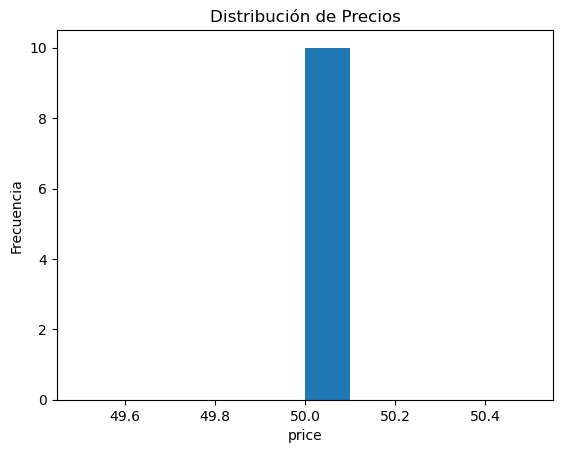

In [138]:
def mostrar_histograma(df: pd.DataFrame, columna: str):
    """Muestra un histograma de precios."""
    df[columna].astype(float).plot(kind='hist', bins=10, title="Distribución de Precios")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.show()

mostrar_histograma(df_samsung_usado, "price")

**2. Artistas Españoles** (Youtube): Queremos ponernos al día con los artistas españoles del momento, por esto se pide:

1. Hacer web scrapping (el método preferido para el estudiante) para obtener los artistas españoles más escuchados en Spotify en Julio de 2024: https://vinilonegro.com/2024/07/top-100-artistas-espanoles-con-mas-om-en-spotify-del-12-al-18-de-julio-de-2024/. El resultado debe ser un DataFrame con el nombre del artista y su posición. Mostrar el DataFrame.

2. Reducir el DataFrame a los 30 primeros en la clasificación y mostrar el DataFrame resumido. Pasar cada nombre por el parámetro "search_query" y realizar una consulta en YouTube (engine = Youtube) para conseguir título del canal, el link y el número de subscriptores. Este paso debería hacerse dentro de un **loop**.

3. Con los resultados, crear un dataframe global (top_30), donde las columnas se correspondan con el título del canal, el link y el número de subscriptores. Ordenarlo ascendientemente por subscriptores y mostrarlo.

Carga librerias

Pregunta 2.1

In [142]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

def obtener_artistas_espanioles():
    """
    Extrae la posición y el nombre de los artistas españoles desde la tabla de la página web.
    """
    url = "https://vinilonegro.com/2024/07/top-100-artistas-espanoles-con-mas-om-en-spotify-del-12-al-18-de-julio-de-2024/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Buscar todas las filas de la tabla
    tabla = soup.find("table")
    filas = tabla.find_all("tr")[1:]  # Omitir la primera fila de encabezado

    # Almacenar los datos en una lista
    datos = []
    for fila in filas:
        columnas = fila.find_all("td")
        posicion = columnas[0].text.strip()
        artista = columnas[3].text.strip()
        datos.append({"Posición": posicion, "Artista": artista})

    # Convertir los datos en un DataFrame
    df_artistas = pd.DataFrame(datos)
    print("Artistas Españoles encontrados:")
    print(df_artistas.head())

    return df_artistas

In [143]:
df_artistas = obtener_artistas_espanioles()

Artistas Españoles encontrados:
  Posición           Artista
0        1  Enrique Iglesias
1        2           Quevedo
2        3           Rosalía
3        4            Rels B
4        5             Saiko


In [144]:
df_artistas

,Posición,Artista
0,1,Enrique Iglesias
1,2,Quevedo
2,3,Rosalía
3,4,Rels B
4,5,Saiko
...,...,...
95,96,Adriana Proenza
96,97,Marta Santos
97,98,Antonio Carmona
98,99,Cyril Kamer


Pregunta 2.2

In [146]:
df_top_30 = df_artistas.head(30)

In [147]:
df_top_30

,Posición,Artista
0,1,Enrique Iglesias
1,2,Quevedo
2,3,Rosalía
3,4,Rels B
4,5,Saiko
5,6,Morad
6,7,Pablo Alborán
7,8,Alejandro Sanz
8,9,Rvfv
9,10,Belinda


Pregunta 2.3

In [149]:
def obtener_info_canales(api_key: str, df_artistas: pd.DataFrame) -> pd.DataFrame:
    """
    Busca información de canales en YouTube para cada artista 
    y selecciona el canal oficial si está disponible.
    """
    resultados_canales = []
    resultados_debug = []  # Lista para almacenar resultados completos de depuración ya que me costo sacar bien los resultados

    for artista in df_artistas["Artista"]:
        params = {
            "api_key": api_key,
            "engine": "youtube",
            "search_query": artista,
        }
        search = GoogleSearch(params)
        results = search.get_dict()
        
        # resultado completo para depuración
        resultados_debug.append(results)
        
        # Verificar en channel_results primero, donde generalmente se muestra el canal principal
        if "channel_results" in results and results["channel_results"]:
            canal_info = results["channel_results"][0]  # tomo el primer canal principal
            canal_name = canal_info.get("title", "N/A")
            canal_link = canal_info.get("link", "No encontrado")
            suscriptores = canal_info.get("subscribers", "N/A")
        
        # Si no hay channel_results, busco en video_results
        elif "video_results" in results and results["video_results"]:
            canal_name = results["video_results"][0]["channel"].get("name", "N/A")
            canal_link = results["video_results"][0]["channel"].get("link", "No encontrado")
            suscriptores = results["video_results"][0]["channel"].get("subscribers", "N/A")
        
        else:
            canal_name, canal_link, suscriptores = "No encontrado", "No encontrado", "N/A"

        resultados_canales.append({
            "Artista": artista,
            "Canal": canal_name,
            "Link": canal_link,
            "Subscriptores": suscriptores
        })

    # resultados a df
    df_resultados = pd.DataFrame(resultados_canales)
    return df_resultados, resultados_debug

df_info_canales, resultados_debug = obtener_info_canales(API_GOOGLE, df_top_30)
print("Información de canales extraída:")
print(df_info_canales)



Información de canales extraída:
                 Artista                     Canal  \
0       Enrique Iglesias          Enrique Iglesias   
1                Quevedo                   Quevedo   
2                Rosalía                   ROSALÍA   
3                 Rels B     Rels B / Skinny Flakk   
4                  Saiko                     SAIKO   
5                  Morad                  M.D. L.R   
6          Pablo Alborán             Pablo Alborán   
7         Alejandro Sanz            Alejandro Sanz   
8                   Rvfv                      RVFV   
9                Belinda                   Belinda   
10             Hombres G     Unboxings y Trayectos   
11              Bad Gyal                  Bad Gyal   
12             Manu Chao                 Manu Chao   
13  La Oreja de Van Gogh      La Oreja de Van Gogh   
14                Aitana                    Aitana   
15           Omar Montes               OMAR MONTES   
16    La Quinta Estación        La Quinta Estació

In [150]:
df_info_canales

,Artista,Canal,Link,Subscriptores
0,Enrique Iglesias,Enrique Iglesias,https://www.youtube.com/@EnriqueIglesias,24900000.00
1,Quevedo,Quevedo,https://www.youtube.com/@QuevedoPD,2060000.00
2,Rosalía,ROSALÍA,https://www.youtube.com/@rosalia,11500000.00
3,Rels B,Rels B / Skinny Flakk,https://www.youtube.com/@rels9,5140000.00
4,Saiko,SAIKO,https://www.youtube.com/@saikobeibe,483000.00
5,Morad,M.D. L.R,https://www.youtube.com/@MDLR1,3130000.00
6,Pablo Alborán,Pablo Alborán,https://www.youtube.com/@pabloalboran,6290000.00
7,Alejandro Sanz,Alejandro Sanz,https://www.youtube.com/@AlejandroSanzTV,3270000.00
8,Rvfv,RVFV,https://www.youtube.com/@Rvfvrxiz_,1200000.00
9,Belinda,Belinda,https://www.youtube.com/@belinda,1130000.00
